<a href="https://colab.research.google.com/github/VittorioBartolomeoSecondin/DVIS-CAValli_Team/blob/main/Data%20preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration and preprocessing

## Importing libraries and connecting to Google Drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
import json
import csv
import requests
import os
import zipfile
from google.colab import files
from google.colab import drive
drive.mount('/content/drive') # turned out to be a good workaround to load a huge amount of data and keep it available

Mounted at /content/drive


## Reading the data

Each dataset file contains several items associated with cities that do not correspond to the main one, that is the one giving the name to the .csv file, but they are in practice <ins>small towns supposed to be clustering in a restricted neighbourhood enclosing the main city</ins>.

Since these small towns have very few occurrences of trees, **we decide to take into account only the main city** (denoted by the attribute *greater_metro* in the dataset) to derive some aggregated information.

In [ ]:
all_files = glob.glob("/content/drive/MyDrive/tree_dataset/*.csv") # all .csv files
all_files.sort() # imposing a given order
print(all_files)

['/content/drive/MyDrive/tree_dataset/Albuquerque_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Anaheim_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Arlington_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Atlanta_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/AuroraCO_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Austin_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Baltimore_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Boston_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Buffalo_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/CapeCoral_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/ColoradoSprings_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Columbus_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Dallas_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_dataset/Denver_Final_2022-06-18.csv', '/content/drive/MyDrive/tree_da

In [ ]:
list_of_df = []

for filename in all_files:
    df = pd.read_csv(filename, low_memory=False)
    if list_of_df:
        df = df.reindex(columns=list_of_df[0].columns) # in order to be consistent with the order of columns throughout all the dataset files
    list_of_df.append(df)

tree_dataset = pd.concat(list_of_df, axis=0, ignore_index=True) # concatenating all dataset files in one dataframe

## Analysing dataset

In [ ]:
print(tree_dataset.shape) # N=5660237, 28 columns expected

(5660237, 28)


The total amount of trees is **5,660,237** (as reported in the introduction on Kaggle) and not 5,132,890 as specified in *README_Dryad.txt* file.


In [ ]:
tree_dataset.isnull().sum()

most_recent_observation             2127842
most_recent_observation_type        3198777
common_name                          892476
scientific_name                      529297
city                                    505
state                                    31
longitude_coordinate                 751709
latitude_coordinate                  751578
address                             1254389
condition                           3038500
height_M                            4951094
native                                    0
height_binned_M                     4996887
diameter_breast_height_binned_CM    1574755
greater_metro                             0
city_ID                             2017770
tree_ID                             5660237
planted_date                        5213598
retired_date                        5658047
location_type                       3469760
zipcode                             4768676
neighborhood                        5132935
location_name                   

We decide to retain **only those columns whose number of null values is lower than 88% of the total amount of observations**.

In [ ]:
filtered_columns = tree_dataset.columns[tree_dataset.isnull().sum() < 0.88 * tree_dataset.shape[0]]
tree_dataset = tree_dataset[filtered_columns]

### Inspecting variables: *state*

In [ ]:
tree_dataset[tree_dataset['state'].isna()]

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,height_M,native,diameter_breast_height_binned_CM,greater_metro,city_ID,location_type,zipcode,diameter_breast_height_CM
746,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
747,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
751,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1202,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1863,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1864,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1865,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1866,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1867,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN
1868,NaN,inventory_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,NaN,NaN,NaN


Only 31 records, that are crammed in the *Albuquerque_Final_2022-06-18.csv* file, **have a null value in the column named *state***. In this case the state can be easily inferred and therefore specified in each of these rows in place of such a null value.

In [ ]:
tree_dataset['state'] = tree_dataset['state'].fillna("New Mexico")

### Inspecting variables: *greater_metro*

In [ ]:
cities = list(set(tree_dataset['greater_metro']))
cities.sort()
print(cities)

['Albuquerque', 'Anaheim', 'Arlington', 'Atlanta', 'AuroraCO', 'Austin', 'Baltimore', 'Boston', 'Buffalo', 'CapeCoral', 'ColoradoSprings', 'Columbus', 'Dallas', 'Denver', 'DesMoines', 'Detroit', 'Durham', 'Fresno', 'GardenGrove', 'GrandRapids', 'Greensboro', 'Honolulu', 'Houston', 'HuntingtonBeach', 'Indianapolis', 'Irvine', 'Jerseycity', 'Knoxville', 'LasVegas', 'LosAngeles', 'Louisville', 'Madison', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'NewOrleans', 'NewYork', 'Oakland', 'OklahomaCity', 'Ontario', 'Orlando', 'OverlandPark', 'Phoenix', 'Pittsburgh', 'Plano', 'Portland', 'Providence', 'RanchoCucamonga', 'Richmond', 'Rochester', 'Sacramento', 'SanDiego', 'SanFrancisco', 'SanJose', 'SantaRosa', 'Seattle', 'SiouxFalls', 'StLouis', 'Stockton', 'Tampa', 'WashingtonDC', 'Worcester']


In [ ]:
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('AuroraCO', 'Aurora')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('CapeCoral', 'Cape Coral')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('ColoradoSprings', 'Colorado Springs')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('DesMoines', 'Des Moines')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('GardenGrove', 'Garden Grove')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('GrandRapids', 'Grand Rapids')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('Jerseycity', 'Jersey City')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('LasVegas', 'Las Vegas')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('LosAngeles', 'Los Angeles')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('NewOrleans', 'New Orleans')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('NewYork', 'New York City')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('OklahomaCity', 'Oklahoma City')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('OverlandPark', 'Overland Park')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('RanchoCucamonga', 'Rancho Cucamonga')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('SanDiego', 'San Diego')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('SanFrancisco', 'San Francisco')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('SanJose', 'San Jose')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('SantaRosa', 'Santa Rosa')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('SiouxFalls', 'Sioux Falls')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('StLouis', 'St. Louis')
tree_dataset['greater_metro'] = tree_dataset['greater_metro'].replace('WashingtonDC', 'Washington DC')

### Inspecting variables: *location_type*

In [ ]:
tree_dataset['location_type'].value_counts()

no_info              1160294
built_environment     604270
green_space           425901
<null>                    12
Name: location_type, dtype: int64

We decided to replace all occurrences of null values (in any format) stored by the column named *location_type* with the value *no_info*.

In [ ]:
tree_dataset['location_type'] = tree_dataset['location_type'].fillna('no_info')
tree_dataset['location_type'] = tree_dataset['location_type'].replace('<null>', 'no_info')
tree_dataset['location_type'].value_counts()

no_info              4630066
built_environment     604270
green_space           425901
Name: location_type, dtype: int64

### Inspecting variables: *scientific_name* and *common_name*

In [ ]:
tree_dataset['scientific_name'].value_counts().to_frame()

,scientific_name
Platanus acerifolia,217762
Lagerstroemia indica,207061
Acer platanoides,198951
Gleditsia triacanthos,167242
Pyrus calleryana,159981
...,...
Persea palustris,1
Acer henryi,1
Maackia chinensis,1
Castanospermum australe,1


In [ ]:
tree_dataset['common_name'].value_counts().to_frame()

,common_name
Norway maple,142560
London planetree,122493
Red maple,121825
Crape myrtle,121775
ok to plant vacant,113631
...,...
Cotton candy magnolia,1
Summer chocolate mimosa,1
Eastern whitebud,1
Coralcole crabapple,1


Some annotations in these fields are very inconsistent (we also checked the original .csv files for such inconsistencies), so we decided to further explore the two variables.

In [ ]:
print('Scientific name null:', tree_dataset['scientific_name'].isnull().sum())
print('Common name null:', tree_dataset['common_name'].isnull().sum())

print('\nBoth null:', len(tree_dataset[(tree_dataset['scientific_name'].isnull()) & (tree_dataset['common_name'].isnull())]))
print('Scientific name null and common name non null:', len(tree_dataset[(tree_dataset['scientific_name'].isnull()) & (~tree_dataset['common_name'].isnull())]))
print('Common name null and scientific name non null:', len(tree_dataset[(tree_dataset['common_name'].isnull()) & (~tree_dataset['scientific_name'].isnull())]))

Scientific name null: 529297
Common name null: 892476

Both null: 206467
Scientific name null and common name non null: 322830
Common name null and scientific name non null: 686009


We create 2 dictionaries:
1. each element having the *scientific_name* as key and the list of associated *common_name*s (with no repetitions and no null values, from the most to the least frequent one) as value;
2. each element having the *common_name* as key and the list of associated *scientific_name*s (with no repetitions and no null values, from the most to the least frequent one) as value.

In [ ]:
# Filter out rows with null scientific names and common names
filtered_tree_dataset = tree_dataset.dropna(subset=['scientific_name', 'common_name'])

# Create a scientific_name dictionary
scientific_dict = filtered_tree_dataset.groupby(['scientific_name', 'common_name']
                                                ).size().reset_index(name='count'
                                                ).sort_values(by=['scientific_name', 'count'], ascending=[True, False]
                                                              ).groupby('scientific_name')['common_name'].apply(list).to_dict()

# Create a common_name dictionary
common_dict = filtered_tree_dataset.groupby(['common_name', 'scientific_name']
                                            ).size().reset_index(name='count'
                                            ).sort_values(by=['common_name', 'count'], ascending=[True, False]
                                                          ).groupby('common_name')['scientific_name'].apply(list).to_dict()

#### Where are they both null?

We will discard these data at the end in order to have a clean dataset (we would not consider them anyway since we use *scientific_name* as the observation key).

In [ ]:
tree_dataset[(tree_dataset['common_name'].isnull()) & (tree_dataset['scientific_name'].isnull())]

,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,height_M,native,diameter_breast_height_binned_CM,greater_metro,city_ID,location_type,zipcode,diameter_breast_height_CM
746,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
747,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
751,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
1202,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
1863,NaN,inventory_date,NaN,NaN,NaN,New Mexico,NaN,NaN,NaN,NaN,NaN,no_info,NaN,Albuquerque,NaN,no_info,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660193,NaN,NaN,NaN,NaN,Worcester,Massachusetts,NaN,NaN,NaN,NaN,NaN,no_info,15.24 to 30.48 cm,Worcester,NaN,no_info,NaN,NaN
5660194,NaN,NaN,NaN,NaN,Worcester,Massachusetts,NaN,NaN,NaN,NaN,NaN,no_info,15.24 to 30.48 cm,Worcester,NaN,no_info,NaN,NaN
5660195,NaN,NaN,NaN,NaN,Worcester,Massachusetts,NaN,NaN,NaN,NaN,NaN,no_info,15.24 to 30.48 cm,Worcester,NaN,no_info,NaN,NaN
5660196,NaN,NaN,NaN,NaN,Worcester,Massachusetts,NaN,NaN,NaN,NaN,NaN,no_info,15.24 to 30.48 cm,Worcester,NaN,no_info,NaN,NaN


#### Where is *scientific_name* null (and *common_name* not)?

We decided to infer the correct *scientific_name* (ONLY when it is NULL) from the *common_name* by using the *common_dict* we created before, otherwise we would not consider these data (since we use *scientific_name* as the observation key).

In [ ]:
tree_dataset['scientific_name'] = tree_dataset.apply(lambda row: common_dict[row['common_name']][0]
                                                     if (pd.isnull(row['scientific_name']) and row['common_name'] in common_dict)
                                                     else row['scientific_name'], axis=1)

The following are some left cases in which the *scientific_name* is still NULL even if the *common_name* is not.

All of such trees haven't got an associated *scientific_name* in the dataset and the reason may be that:
- there are errors/misspellings;
- they consist of an alternative writing for a *common_name* present in the dictionary;
- there are just very few of them with no associated *scientific_name*.

In [ ]:
s_null = tree_dataset[(tree_dataset['scientific_name'].isnull()) & (~tree_dataset['common_name'].isnull())]
s_null['common_name'].value_counts().to_frame()

,common_name
ok to plant vacant,113631
Vacant,55667
Nrwy maple,10941
Honeylocust var.,9919
Vacant planting well,4567
...,...
King sago,1
palm,1
Acer negundo) boxelder,1
New tree,1


Here we manually correct the errors (meaningless values) we managed to find, replacing them with NULL.

In [ ]:
tree_dataset['common_name'] = tree_dataset['common_name'].replace('ok to plant vacant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('(see notes)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant planting well', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant/inadequate spacing', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Dead tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site small', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Other tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant/ok to replant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('999', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site medium', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site small (vacant site small)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site not suitable', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('small vacant planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Not specified', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site large', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('medium vacant planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant/prop. owner objects', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump obstructed', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site) vacant site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site medium (vacant site medium)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site large (vacant site large)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unsuitable site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('No tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('species', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump (stump)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('large vacant planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('0', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump/replace', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vacant site no plant (vacant site no plant)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unknown', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Available planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump) stump', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('_multiple species (_multiple species)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Resident refusal', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('not accessible stump', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Stump/donotreplace', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unidentifiable tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Potential site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('tree (unknown tree)', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Not a planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('No replant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Poor planting site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('medium planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('small planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('448', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('No sewer/water marked w', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Property owner refused tree w', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('445', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('New tree planted', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Sufficient space non', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Private tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('For unknown street name', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Deadwooding', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('*calls', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('446', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('443', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('444', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('New tree', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('large planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Planting space', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Obstruction at site w', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Vajcant', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('1', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('No tree site', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('tree) unknown tree', None)

Here we manually correct the misspellings we managed to find (helping ourselves with regular expressions for the exploration), replacing them with the correct *common_name* present in the common_dict.

In [ ]:
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Nrwy maple', 'Norway maple')

tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Gleditsia', 'Gleditsia triacanthos')
del scientific_dict['Gleditsia']
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Honeylocust var.', 'Honeylocust')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Indico crape myrtle', 'Crape myrtle')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Ivory silk japanese lilac', 'Japanese tree lilac')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Mahogany', 'West indian mahogany')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('London planetree hybrid', 'London planetree')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('pear', 'Common (fruiting) pear tree')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Elm (hybrid)', 'Hybrid elm')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Hedge (english) maple', 'Hedge maple')

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Redmond american basswood', 'American linden')

After these modifications, we re-infer the correct *scientific_name*.

In [ ]:
tree_dataset['scientific_name'] = tree_dataset.apply(lambda row: common_dict[row['common_name']][0]
                                                     if (pd.isnull(row['scientific_name']) and row['common_name'] in common_dict)
                                                     else row['scientific_name'], axis=1)

#### Where is *common_name* null (and *scientific_name* not)?

We decided to infer the correct *common_name* from the *scientific_name* using the *scientific_dict* we created before: we associate the correct *common_name* (the corresponding most frequent one) to each *scientific_name* (even when *common_name* is NOT NULL already, we replace it with its most frequent version).

In [ ]:
tree_dataset['common_name'] = tree_dataset.apply(lambda row: scientific_dict[row['scientific_name']][0]
                                                 if row['scientific_name'] in scientific_dict
                                                 else row['common_name'], axis=1)

The following are some left cases in which the *common_name* is still NULL even if the *scientific_name* is not.

All of such trees haven't got an associated *common_name* in the dataset and the reason may be that:
- there are errors/misspellings;
- they consist of an alternative writing for a *scientific_name* present in the dictionary;
- there are just very few of them with no associated *common_name*.

In [ ]:
c_null = tree_dataset[(tree_dataset['common_name'].isnull()) & (~tree_dataset['scientific_name'].isnull())]
c_null['scientific_name'].value_counts().to_frame()

,scientific_name
Unassigned,12042
Solanum rantonnetii,625
Celtis L.,567
Prunus armenica,294
Laurus L.,252
...,...
Juniperus procumbens,1
Sorbus decora,1
Metrosideros Banks,1
Eleagnus pungens,1


Here we manually correct the errors (meaningless values) we managed to find, replacing them with NULL.

In [ ]:
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Unassigned', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Arbor SchrÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¶der,', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Red Sea', None) ### Not present in the API

Here we manually correct some misspellings we managed to find, replacing them with the correct value.

In [ ]:
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Solanum rantonnetii', 'Lycianthes rantonnetii')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Prunus armenica', 'Prunus armeniaca')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬ÂGordlinia grandiflora', 'Gordlinia grandiflora')

tree_dataset['common_name'] = tree_dataset.apply(lambda row: scientific_dict[row['scientific_name']][0]
                                                 if row['scientific_name'] in scientific_dict
                                                 else row['common_name'], axis=1)

Here we try to automatize some corrections of *scientific_name*s when *common_name*s are NULL: these *scientific_name*s are NOT present in the dictionary, so we assign them (if there are matches) to the closest and more general species of tree (for example: 'Pyrus L.' converted to 'Pyrus').

In [ ]:
# Compute the list (with no repetitions) of trees with scientific_name but no common_name
c_null = tree_dataset[(tree_dataset['common_name'].isnull()) & (~tree_dataset['scientific_name'].isnull())]
remaining_tree_list = list(c_null['scientific_name'].value_counts().index)
remaining_tree_list.sort()

# Create a replace_dict to associate the scientific name with an existing one (if possible) or a new one
replace_dict = {}

for tree in remaining_tree_list:

    first = tree.split()[0]
    pattern = re.compile(rf'{first}')
    matching_keys = [key for key in scientific_dict if pattern.match(key)]

    if len(matching_keys) > 0 and first == matching_keys[0]:
        new_scientific = matching_keys[0]
    else:
        new_scientific = tree
        scientific_dict.update({new_scientific: [new_scientific]})

    print(tree, "-->", new_scientific)
    replace_dict.update({tree: new_scientific})

Acer rubra --> Acer
Aesculus xcarnea --> Aesculus
Afrocarpus falcatus --> Afrocarpus
Agave --> Agave
Albizia amara --> Albizia
Althaea officinalis --> Althaea officinalis
Amorpha fruticosa --> Amorpha fruticosa
Aronia Medik. --> Aronia Medik.
Baccharis --> Baccharis
Callistemon R. --> Callistemon
Camellia L. --> Camellia
Casuarina L. --> Casuarina
Catalpa Scop. --> Catalpa
Celtis L. --> Celtis
Celtis chinensis --> Celtis
Cercis yunnanensis --> Cercis
Chionanthus chinensis --> Chionanthus
Chionanthus virginica --> Chionanthus
Cinnamomum glanduliferum --> Cinnamomum
Citrus L. --> Citrus
Cliftonia monophylla --> Cliftonia monophylla
Cornus canadensis --> Cornus
Cornus nuttalli --> Cornus
Corymbia calophylla --> Corymbia calophylla
Cotinus Mill. --> Cotinus
Cotoneaster Medik. --> Cotoneaster
Crataegus opaca --> Crataegus
Cupressus funebris --> Cupressus
Datura --> Datura
Dodonaea Mill. --> Dodonaea Mill.
Echium candicans --> Echium candicans
Eleagnus pungens --> Eleagnus pungens
Eriobotrya

In [ ]:
tree_dataset['scientific_name'] = tree_dataset.apply(lambda row: replace_dict[row['scientific_name']]
                                                     if row['scientific_name'] in replace_dict
                                                     else row['scientific_name'], axis=1)

#### Where are they both NON null?

We managed to find some cases in which BOTH the *scientific_name* and the *common_name* are NON null, but their values are MEANINGLESS.

We decided to correct them manually.

In [ ]:
print("Common names associated with 'Tree':", scientific_dict.get('Tree', 'NO MATCHES FOUND'))
print("Common names associated with 'Not':", scientific_dict.get('Not', 'NO MATCHES FOUND'))
print("Common names associated with 'Unidentified':", scientific_dict.get('Unidentified', 'NO MATCHES FOUND'))
print("Common names associated with 'None':", scientific_dict.get('None', 'NO MATCHES FOUND'))
print("Common names associated with 'New York':", scientific_dict.get('New York', 'NO MATCHES FOUND'))
print("Common names associated with 'Unknown':", scientific_dict.get('Unknown', 'NO MATCHES FOUND'))

Common names associated with 'Tree': ['Tree site deleted', 'Tree hardwood', 'Tree site does not exist', 'Tree softwood']
Common names associated with 'Not': ['Not city planted/maintained']
Common names associated with 'Unidentified': ['Unidentified', 'Juniper?']
Common names associated with 'None': ['None']
Common names associated with 'New York': ['New zealand tea tree', 'New tree site']
Common names associated with 'Unknown': ['Unknown']


In [ ]:
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Tree site deleted', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Tree hardwood', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Tree site does not exist', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Tree softwood', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Tree', None)
del scientific_dict['Tree']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Not city planted/maintained', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Not', None)
del scientific_dict['Not']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unidentified', None)
tree_dataset['common_name'] = tree_dataset['common_name'].replace('Juniper?', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Unidentified', None)
del scientific_dict['Unidentified']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('None', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('None', None)
del scientific_dict['None']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('New tree site', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('New York', None)
del scientific_dict['New York']

tree_dataset['common_name'] = tree_dataset['common_name'].replace('Unknown', None)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Unknown', None)
del scientific_dict['Unknown']

While exploring the scientific_dict, we managed to find some cases in which BOTH the *scientific_name* and the *common_name* are NON NULL, but the *scientific_name* contains an error.

We decided to manually correct them.

In [ ]:
## 'Acoelorraphe  wrightii' --> 'Acoelorrhaphe  wrightii'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Acoelorraphe wrightii', 'Acoelorrhaphe wrightii')
del scientific_dict['Acoelorraphe wrightii']

## 'TipuanaÃƒâ€šÃ‚Â\xa0tipu' --> 'Tipuana tipu'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('TipuanaÃƒâ€šÃ‚Â\xa0tipu', 'Tipuana tipu')
del scientific_dict['TipuanaÃƒâ€šÃ‚Â\xa0tipu']

## 'x Hesperotropsis' --> 'Cupressocyparis leylandii'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('x Hesperotropsis', 'Cupressocyparis leylandii')
del scientific_dict['x Hesperotropsis']

## 'ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dChiranthofremontia lenzii' --> 'Chiranthofremontia lenzii'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dChiranthofremontia lenzii', 'Chiranthofremontia lenzii')
scientific_dict['Chiranthofremontia lenzii'] = scientific_dict['ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dChiranthofremontia lenzii']
del scientific_dict['ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dChiranthofremontia lenzii']

## 'ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dSycoparrotia P.' --> 'Sycoparrotia semidecidua'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dSycoparrotia P.', 'Sycoparrotia semidecidua')
scientific_dict['Sycoparrotia semidecidua'] = scientific_dict['ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dSycoparrotia P.']
del scientific_dict['ÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Â\x9dSycoparrotia P.']

## 'Tillia' --> 'Tilia'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Tillia', 'Tilia')
del scientific_dict['Tillia']

## 'Spirea' --> 'Spiraea'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Spirea', 'Spiraea')
scientific_dict['Spiraea'] = scientific_dict['Spirea']
del scientific_dict['Spirea']

## 'Prunnus yedoensis' --> 'Prunus yedoensis'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Prunnus yedoensis', 'Prunus yedoensis')
del scientific_dict['Prunnus yedoensis']

## 'PInus bungeana' --> 'Pinus bungeana'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('PInus bungeana', 'Pinus bungeana')
del scientific_dict['PInus bungeana']

## 'Gingko biloba' and 'Ginko biloba'--> 'Ginkgo biloba'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Gingko biloba', 'Ginkgo biloba')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ginko biloba', 'Ginkgo biloba')
del scientific_dict['Gingko biloba']
del scientific_dict['Ginko biloba']

## 'Crateagus'--> 'Crataegus'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Crateagus', 'Crataegus')
del scientific_dict['Crateagus']

## 'Cladastris kentukea'--> 'Cladrastis kentukea'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Cladastris kentukea', 'Cladrastis kentukea')
del scientific_dict['Cladastris kentukea']

## 'Cedrella fissilis'--> 'Cedrela fissilis'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Cedrella fissilis', 'Cedrela fissilis')
del scientific_dict['Cedrella fissilis']

## 'Camelia'--> 'Camellia'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Camelia', 'Camellia')
del scientific_dict['Camelia']

## 'Bauhania'--> 'Bauhinia'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Bauhania', 'Bauhinia')
del scientific_dict['Bauhania']

## 'Ficus RÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¶ding,'--> 'Ficus'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ficus RÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¶ding,', 'Ficus')
del scientific_dict['Ficus RÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¶ding,']

## "Eucalyptus L'HÃƒÆ’Ã†â€™Ãƒâ€\xa0Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Å¡Ãƒâ€šÃ‚Â©r."--> 'Eucalyptus'
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace("Eucalyptus L'HÃƒÆ’Ã†â€™Ãƒâ€\xa0Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Å¡Ãƒâ€šÃ‚Â©r.", 'Eucalyptus')
del scientific_dict["Eucalyptus L'HÃƒÆ’Ã†â€™Ãƒâ€\xa0Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Å¡Ãƒâ€šÃ‚Â©r."]

#### Explore remaining errors

We change *scientific_name*s to be consistent with API (otherwise we would get some errors during the API call).

In [ ]:
### Not present in the API (could not find a rename)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Japanese Meconematinae', None) # kingdom: Animalia (Arthropoda)
del scientific_dict['Japanese Meconematinae']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Hermosa', None) # kingdom: Animalia (Arthropoda)
del scientific_dict['Hermosa']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Persia', None) # kingdom: Animalia (Mollusca)
del scientific_dict['Persia']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Nossa chinensis', None) # kingdom: Animalia (Arthropoda)
del scientific_dict['Nossa chinensis']

In [ ]:
### Not present in the API (found a rename)
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Acer L.', 'Acer')
del scientific_dict['Acer L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Aesculus L.', 'Aesculus')
del scientific_dict['Aesculus L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('African Crioceridae', 'Rhus lancea')
del scientific_dict['African Crioceridae']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Arbutus L.', 'Arbutus')
del scientific_dict['Arbutus L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Carya Nutt.', 'Carya')
del scientific_dict['Carya Nutt.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ceanothus L.', 'Ceanothus')
del scientific_dict['Ceanothus L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Chionanthus retusa', 'Chionanthus retusus')
del scientific_dict['Chionanthus retusa']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Conus aurora', 'Cornus')
del scientific_dict['Conus aurora']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Crataegus L.', 'Crataegus')
del scientific_dict['Crataegus L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Eucalyptus macarthuri', 'Eucalyptus macarthurii')
scientific_dict['Eucalyptus macarthurii'] = scientific_dict.pop('Eucalyptus macarthuri')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Gleditsia tricanthos', 'Gleditsia triacanthos')
del scientific_dict['Gleditsia tricanthos']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Gleditsia tricanthus', 'Gleditsia triacanthos')
del scientific_dict['Gleditsia tricanthus']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Halesia Ellis', 'Halesia')
del scientific_dict['Halesia Ellis']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Handroanthus Mattos', 'Handroanthus impetiginosus')
del scientific_dict['Handroanthus Mattos']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Handroanthus impetiginosum', 'Handroanthus impetiginosus')
del scientific_dict['Handroanthus impetiginosum']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Helieta parvifolia', 'Helietta parvifolia')
scientific_dict['Helietta parvifolia'] = scientific_dict.pop('Helieta parvifolia')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ilex L.', 'Ilex')
del scientific_dict['Ilex L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ilex altaclarensis', 'Ilex altaclerensis')
del scientific_dict['Ilex altaclarensis']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Juglans L.', 'Juglans')
del scientific_dict['Juglans L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Lagerstroemia L.', 'Lagerstroemia')
del scientific_dict['Lagerstroemia L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Leptospermum J.', 'Leptospermum')
del scientific_dict['Leptospermum J.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Liquidambar L.', 'Liquidambar')
del scientific_dict['Liquidambar L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Lyonothamnus A.', 'Lyonothamnus')
del scientific_dict['Lyonothamnus A.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Lyonothamnus asplenifolius', 'Lyonothamnus aspleniifolius')
scientific_dict['Lyonothamnus aspleniifolius'] = scientific_dict.pop('Lyonothamnus asplenifolius')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Malus Mill.', 'Malus')
del scientific_dict['Malus Mill.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Melia L.', 'Melia')
scientific_dict['Melia'] = scientific_dict.pop('Melia L.')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Mlaus scheideckeri', 'Malus scheideckeri')
scientific_dict['Malus scheideckeri'] = scientific_dict.pop('Mlaus scheideckeri')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Myrospernum sousanum', 'Myrospermum sousanum')
scientific_dict['Myrospermum sousanum'] = scientific_dict.pop('Myrospernum sousanum')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Pistacia L.', 'Pistacia')
del scientific_dict['Pistacia L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Prunus L.', 'Prunus')
del scientific_dict['Prunus L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Pterostyrax hispida', 'Pterostyrax hispidus')
del scientific_dict['Pterostyrax hispida']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Quercus gambellii', 'Quercus gambelii')
scientific_dict['Quercus gambelii'] = scientific_dict.pop('Quercus gambellii')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Rhaphiolepis Lindl.', 'Rhaphiolepis')
del scientific_dict['Rhaphiolepis Lindl.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Rhododendron sp.', 'Rhododendron')
del scientific_dict['Rhododendron sp.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Rhus copallinum var. latifolia', 'Rhus copallinum')
del scientific_dict['Rhus copallinum var. latifolia']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Schinus polygamus', 'Schinus polygama')
scientific_dict['Schinus polygama'] = scientific_dict.pop('Schinus polygamus')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Schinus terebinthifolius', 'Schinus terebinthifolia')
del scientific_dict['Schinus terebinthifolius']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Sorbus L.', 'Sorbus')
del scientific_dict['Sorbus L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Tilia sp.', 'Tilia')
del scientific_dict['Tilia sp.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Tristaniopsis Brongn.', 'Tristaniopsis')
scientific_dict['Tristaniopsis'] = scientific_dict.pop('Tristaniopsis Brongn.')
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ulmus hybrid', 'Ulmus')
del scientific_dict['Ulmus hybrid']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ulmus thomasi', 'Ulmus thomasii')
del scientific_dict['Ulmus thomasi']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Viburnum L.', 'Viburnum')
del scientific_dict['Viburnum L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Wilsoniana', 'Ulmus wilsoniana')
del scientific_dict['Wilsoniana']

tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Aronia Medik.', 'Aronia prunifolia')
del scientific_dict['Aronia Medik.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Dodonaea Mill.', 'Dodonaea viscosa')
del scientific_dict['Dodonaea Mill.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Eleagnus pungens', 'Elaeagnus pungens')
del scientific_dict['Eleagnus pungens']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Eriobotrya Lindl.', 'Eriobotrya japonica')
del scientific_dict['Eriobotrya Lindl.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Metrosideros Banks', 'Metrosideros excelsa')
del scientific_dict['Metrosideros Banks']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Myrtus L.', 'Myrtus communis')
del scientific_dict['Myrtus L.']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ostrea caroliniana', 'Ostrya')
del scientific_dict['Ostrea caroliniana']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Oxydendron arboreum', 'Oxydendrum arboreum')
del scientific_dict['Oxydendron arboreum']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Solanum L.', 'Solanum lycopersicum')
scientific_dict['Solanum lycopersicum'] = scientific_dict.pop('Solanum L.')
scientific_dict['Solanum lycopersicum'] = ['Garden tomato']

tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Populus hybrid', 'Populus')
del scientific_dict['Populus hybrid']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Styrax japonica', 'Styrax japonicus')
del scientific_dict['Styrax japonica']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Americana', 'Prunus americana')
del scientific_dict['Americana']
tree_dataset['scientific_name'] = tree_dataset['scientific_name'].replace('Ailanthus altissimus', 'Ailanthus altissima')
del scientific_dict['Ailanthus altissimus']

After the modification of the *scientific_name*s, we re-infer the correct *common_name*s.

In [ ]:
tree_dataset['common_name'] = tree_dataset.apply(lambda row: scientific_dict[row['scientific_name']][0]
                                                 if row['scientific_name'] in scientific_dict
                                                 else row['common_name'], axis=1)

Here we explore the remaining errors: *scientific_name* NULL and *common_name* not: if these errors don't get manually resolved, the observations will be removed from the dataset.

In [ ]:
s_null = tree_dataset[(tree_dataset['scientific_name'].isnull()) & (~tree_dataset['common_name'].isnull())]
s_null_ordered = s_null.sort_values(by='common_name', ascending=True)
s_null['common_name'].value_counts().to_frame()

,common_name
jap tree lilac,1256
cherry,1215
Rocky mtn juniper,1122
Nrwy column maple,1013
Imperial honey locust,999
...,...
Paulownia tomentosa) royal paulownia,1
Liquidambar formosana) formosan sweetgum,1
Acer negundo) boxelder,1
Datura,1


Here we remove all the observations for which *scientific_name* is NULL.

In [ ]:
tree_dataset.dropna(subset=['scientific_name'], how='all', inplace=True)

### New columns *tree_genus*, *tree_family* and *tree_order* (with API call)

We create 3 dictionaries:
1. each element having the *scientific_name* as key and the associated *tree_genus* as value;
2. each element having the *scientific_name* as key and the associated *tree_family* as value;
3. each element having the *scientific_name* as key and the associated *tree_order* as value.

In [ ]:
# Create a scientific_to_family_dict and a scientific_to_order_dict
scientific_to_genus_dict = {}
scientific_to_family_dict = {}
scientific_to_order_dict = {}

for index, scientific in enumerate(list(scientific_dict.keys())):
  scientific_lower = scientific.lower()
  scientific_split = scientific_lower.split()

  try:
    print('Number', str(index + 1), '--> TREE:', scientific)
    if len(scientific_split) == 1:
      url = ('https://api.gbif.org/v1/species?name=' + scientific_split[0])
    else:
      url = ('https://api.gbif.org/v1/species?name=' + scientific_split[0] +'%20'+ scientific_split[1])

    json_tree = requests.get(url).json()['results']
    for idx in range(len(json_tree)):
      try:
        kingdom = json_tree[idx]['kingdom']
        if kingdom != "Plantae":
          continue
        else:
          scientific_to_family_dict[scientific] = json_tree[idx]['family']
          scientific_to_order_dict[scientific] = json_tree[idx]['order']
          if len(scientific_split) == 1:
            try:
              scientific_to_genus_dict[scientific] = json_tree[idx]['genus']
            except:
              scientific_to_genus_dict[scientific] = 'NONE'
          else:
            scientific_to_genus_dict[scientific] = json_tree[idx]['genus']
          break
      except:
        continue
  except:
    print('\nERROR DUE TO SCIENTIFIC NAME:', scientific)

Number 1 --> TREE: Abelia grandiflora
Number 2 --> TREE: Abies
Number 3 --> TREE: Abies amabilis
Number 4 --> TREE: Abies balsamea
Number 5 --> TREE: Abies borisii-regis
Number 6 --> TREE: Abies concolor
Number 7 --> TREE: Abies firma
Number 8 --> TREE: Abies fraseri
Number 9 --> TREE: Abies grandis
Number 10 --> TREE: Abies homolepis
Number 11 --> TREE: Abies koreana
Number 12 --> TREE: Abies lasiocarpa
Number 13 --> TREE: Abies magnifica
Number 14 --> TREE: Abies nordmanniana
Number 15 --> TREE: Abies pinsapo
Number 16 --> TREE: Abies procera
Number 17 --> TREE: Abies veitchii
Number 18 --> TREE: Abutilon hybridum
Number 19 --> TREE: Abutilon pictum
Number 20 --> TREE: Abutilon striatum
Number 21 --> TREE: Acacia
Number 22 --> TREE: Acacia aneura
Number 23 --> TREE: Acacia armata
Number 24 --> TREE: Acacia auriculiformis
Number 25 --> TREE: Acacia baileyana
Number 26 --> TREE: Acacia cognata
Number 27 --> TREE: Acacia confusa
Number 28 --> TREE: Acacia cultriformis
Number 29 --> TREE

We add the 3 new columns to the dataset.

In [ ]:
tree_dataset['tree_genus'] = tree_dataset.apply(lambda row: scientific_to_genus_dict[row['scientific_name']]
                                                if row['scientific_name'] in scientific_to_genus_dict
                                                else None, axis=1)

tree_dataset['tree_family'] = tree_dataset.apply(lambda row: scientific_to_family_dict[row['scientific_name']]
                                                 if row['scientific_name'] in scientific_to_family_dict
                                                 else None, axis=1)

tree_dataset['tree_order'] = tree_dataset.apply(lambda row: scientific_to_order_dict[row['scientific_name']]
                                                if row['scientific_name'] in scientific_to_order_dict
                                                else None, axis=1)

We create 3 dictionaries:
1. each element having the *tree_genus* as key and the list of associated *scientific_name*s as value;
2. each element having the *tree_family* as key and the list of associated *scientific_name*s as value;
3. each element having the *tree_order* as key and the list of associated *scientific_name*s as value.

In [ ]:
# Create a genus_to_scientific_dict
genus_to_scientific_dict = tree_dataset.groupby(['tree_genus', 'scientific_name']
                                                ).size().reset_index(name='count'
                                                ).sort_values(by=['scientific_name', 'count'], ascending=[True, False]
                                                              ).groupby('tree_genus')['scientific_name'].apply(list).to_dict()


# Create a family_to_scientific_dict
family_to_scientific_dict = tree_dataset.groupby(['tree_family', 'scientific_name']
                                                 ).size().reset_index(name='count'
                                                 ).sort_values(by=['scientific_name', 'count'], ascending=[True, False]
                                                              ).groupby('tree_family')['scientific_name'].apply(list).to_dict()


# Create a order_to_scientific_dict
order_to_scientific_dict = tree_dataset.groupby(['tree_order', 'scientific_name']
                                                ).size().reset_index(name='count'
                                                ).sort_values(by=['scientific_name', 'count'], ascending=[True, False]
                                                              ).groupby('tree_order')['scientific_name'].apply(list).to_dict()

In [ ]:
tree_dataset['tree_genus'].value_counts()

Acer              631158
Quercus           490368
Fraxinus          296739
Platanus          254946
Gleditsia         226027
                   ...  
Toxicodendron          1
Ternstroemia           1
Rhapidophyllum         1
Passiflora             1
Elaeis                 1
Name: tree_genus, Length: 554, dtype: int64

In [ ]:
genus_df = pd.DataFrame(columns=['Genus', 'Count', 'List'])
for genus in list(genus_to_scientific_dict.keys()):
    df = pd.DataFrame({'Genus': [genus], 'Count': [len(genus_to_scientific_dict.get(genus))], 'List': [genus_to_scientific_dict.get(genus)]})
    genus_df = pd.concat([genus_df, df], ignore_index=True)
genus_df

,Genus,Count,List
0,Abelia,1,[Abelia grandiflora]
1,Abies,16,"[Abies, Abies amabilis, Abies balsamea, Abies ..."
2,Abutilon,1,[Abutilon hybridum]
3,Acacia,25,"[Acacia, Acacia aneura, Acacia armata, Acacia ..."
4,Acaciella,1,[Leucaena glauca]
...,...,...,...
549,Yucca,9,"[Yucca, Yucca aloifolia, Yucca brevifolia, Yuc..."
550,Yulania,1,[Magnolia liliflora]
551,Zanthoxylum,5,"[Zanthoxylum, Zanthoxylum americanum, Zanthoxy..."
552,Zelkova,3,"[Zelkova, Zelkova serrata, Zelkova sinica]"


In [ ]:
family_df = pd.DataFrame(columns=['Family', 'Count', 'List'])
for family in list(family_to_scientific_dict.keys()):
    df = pd.DataFrame({'Family': [family], 'Count': [len(family_to_scientific_dict.get(family))], 'List': [family_to_scientific_dict.get(family)]})
    family_df = pd.concat([family_df, df], ignore_index=True)
family_df

,Family,Count,List
0,Acanthaceae,1,[Thunbergia]
1,Altingiaceae,4,"[Liquidambar, Liquidambar formosana, Liquidamb..."
2,Anacardiaceae,29,"[Cotinus, Cotinus coggygria, Cotinus obovatus,..."
3,Annonaceae,8,"[Annona cherimola, Annona glabra, Annona muric..."
4,Apocynaceae,11,"[Calotropis gigantea, Carissa grandiflora, Cas..."
...,...,...,...
135,Verbenaceae,4,"[Citharexylum spinosum, Duranta erecta, Durant..."
136,Viburnaceae,24,"[Sambucus, Sambucus caerulea, Sambucus canaden..."
137,Vitaceae,1,[Parthenocissus quinquefolia]
138,Zamiaceae,2,"[Dioon spinulosum, Stangeria eriopus]"


In [ ]:
order_df = pd.DataFrame(columns=['Order', 'Count', 'List'])
for order in list(order_to_scientific_dict.keys()):
    df = pd.DataFrame({'Order': [order], 'Count': [len(order_to_scientific_dict.get(order))], 'List': [order_to_scientific_dict.get(order)]})
    order_df = pd.concat([order_df, df], ignore_index=True)
order_df

,Order,Count,List
0,Apiales,35,"[Aralia, Aralia chinensis, Aralia elata, Arali..."
1,Aquifoliales,17,"[Ilex altaclerensis, Ilex aquifolium, Ilex att..."
2,Arecales,84,"[Acoelorrhaphe wrightii, Acrocomia totai, Adon..."
3,Asparagales,24,"[Agave, Aloe, Aloe arborescens, Aloe barberae,..."
4,Asterales,3,"[Baccharis, Baccharis halimifolia, Baccharis p..."
5,Austrobaileyales,2,"[Illicium floridanum, Illicium parviflorum]"
6,Boraginales,7,"[Cordia boissieri, Cordia sebestena, Cordia su..."
7,Brassicales,2,"[Carica papaya, Moringa oleifera]"
8,Buxales,3,"[Buxus, Buxus microphylla, Buxus sempervirens]"
9,Caryophyllales,17,"[Bougainvillea, Bougainvillea spectabilis, Cac..."


### Inspecting variables: *height_M*

In [ ]:
tree_dataset['height_M'].isnull().sum()

4591538

In [ ]:
tree_dataset['height_M'].sort_values(ascending=True).to_frame()

,height_M
4791468,-3.28084
1383855,0.00000
3744485,0.00000
3744483,0.00000
3744482,0.00000
...,...
5660232,NaN
5660233,NaN
5660234,NaN
5660235,NaN


In [ ]:
print(tree_dataset['height_M'].max())
print(tree_dataset['height_M'].min())

9931.10268
-3.28084


In [ ]:
tree_dataset['height_M'] = tree_dataset['height_M'].apply(lambda x: x if x > 0 else None)

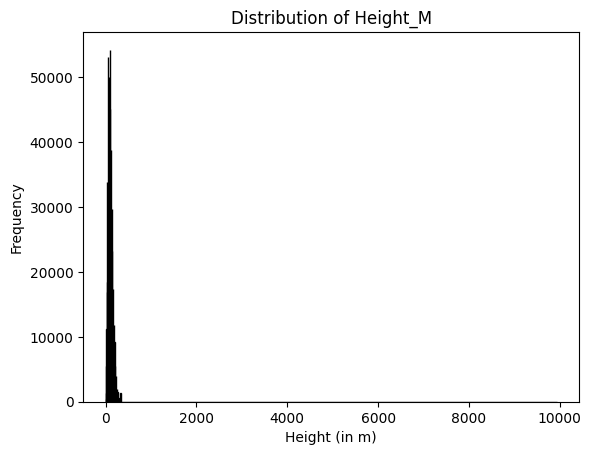

In [ ]:
plt.hist(tree_dataset['height_M'], bins=2000, color='skyblue', edgecolor='black')
plt.xlabel('Height (in m)')
plt.ylabel('Frequency')
plt.title('Distribution of Height_M')
plt.show()

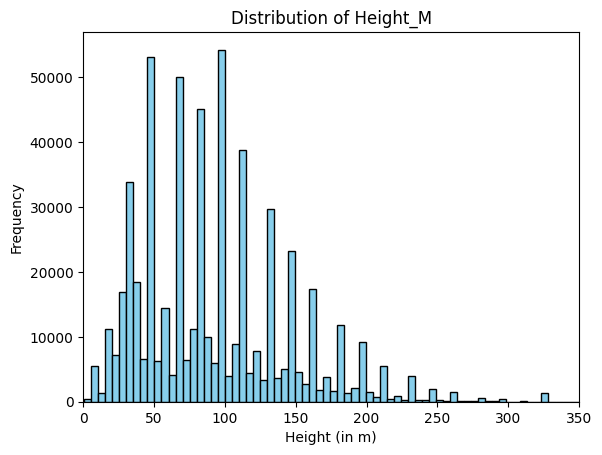

In [ ]:
plt.hist(tree_dataset['height_M'], bins=2000, color='skyblue', edgecolor='black')
plt.xlabel('Height (in m)')
plt.ylabel('Frequency')
plt.title('Distribution of Height_M')
plt.xlim(0, 350)
plt.show()

In [ ]:
print(len(tree_dataset.loc[tree_dataset['height_M'] >= 150]))
print(len(tree_dataset.loc[tree_dataset['height_M'] < 150]))
print(tree_dataset['height_M'].isnull().sum())

77373
491386
4643698


### Inspecting variables: *diameter_breast_height_CM*

In [ ]:
tree_dataset['diameter_breast_height_CM'].isnull().sum()

2505424

In [ ]:
tree_dataset['diameter_breast_height_CM'].sort_values(ascending=True).to_frame()

,diameter_breast_height_CM
4024304,-2.54
4016294,-2.54
4016161,-2.54
4021434,-2.54
5174723,0.00
...,...
5660232,NaN
5660233,NaN
5660234,NaN
5660235,NaN


In [ ]:
print(tree_dataset['diameter_breast_height_CM'].max())
print(tree_dataset['diameter_breast_height_CM'].min())

25397.46
-2.54


In [ ]:
tree_dataset['diameter_breast_height_CM'] = tree_dataset['diameter_breast_height_CM'].apply(lambda x: x if x > 0 else None)

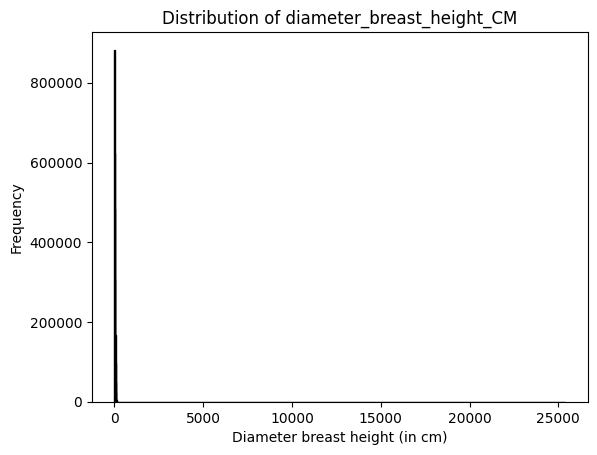

In [ ]:
plt.hist(tree_dataset['diameter_breast_height_CM'], bins=2000, color='skyblue', edgecolor='black')
plt.xlabel('Diameter breast height (in cm)')
plt.ylabel('Frequency')
plt.title('Distribution of diameter_breast_height_CM')
plt.show()

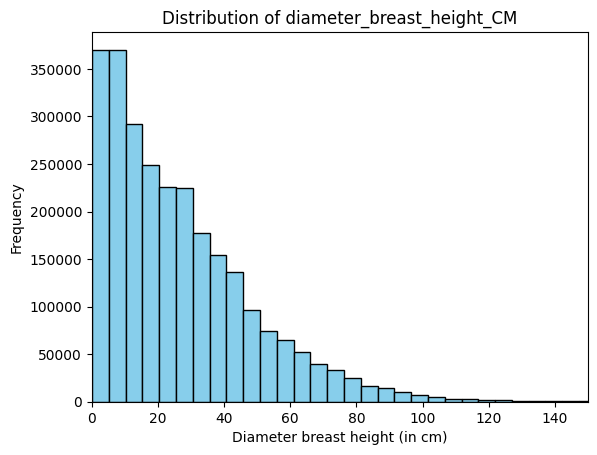

In [ ]:
plt.hist(tree_dataset['diameter_breast_height_CM'], bins=5000, color='skyblue', edgecolor='black')
plt.xlabel('Diameter breast height (in cm)')
plt.ylabel('Frequency')
plt.title('Distribution of diameter_breast_height_CM')
plt.xlim(0, 150)
plt.show()

In [ ]:
print(len(tree_dataset.loc[tree_dataset['diameter_breast_height_CM'] >= 150]))
print(len(tree_dataset.loc[tree_dataset['diameter_breast_height_CM'] < 150]))
print(tree_dataset['diameter_breast_height_CM'].isnull().sum())

2798
2651876
2557783


### Inspecting variables: *most_recent_observation*

In [ ]:
dates = list(tree_dataset['most_recent_observation'].value_counts().index)

for date in dates:
  try:
      date_object = pd.to_datetime(date)
  except ValueError:
      print("\n\nATTENTION!!!!! Unable to parse the date string -->", date)
      print(tree_dataset.loc[tree_dataset['most_recent_observation']==date])



ATTENTION!!!!! Unable to parse the date string --> 04/01/3015
       most_recent_observation most_recent_observation_type  common_name  \
548863              04/01/3015               inspected_date  Blue spruce   
560405              04/01/3015               inspected_date    Green ash   

               scientific_name      city state  longitude_coordinate  \
548863           Picea pungens  Columbus  Ohio            -83.035893   
560405  Fraxinus pennsylvanica  Columbus  Ohio            -83.004196   

        latitude_coordinate address condition  ...               native  \
548863            40.116118     NaN      poor  ...           introduced   
560405            40.031319     NaN      poor  ...  naturally_occurring   

       diameter_breast_height_binned_CM greater_metro city_ID  \
548863                15.24 to 30.48 cm      Columbus   73244   
560405                15.24 to 30.48 cm      Columbus  109529   

            location_type zipcode diameter_breast_height_CM  tree_ge

### Results at the end of the manipulations

In [ ]:
print("Dataset sum of null values for each variable:\n")
print(tree_dataset.isnull().sum()) # final count of null values
print("\nDataset shape:", tree_dataset.shape) # final shape

Dataset sum of null values for each variable:

most_recent_observation             1986388
most_recent_observation_type        2951358
common_name                               0
scientific_name                           0
city                                    472
state                                     0
longitude_coordinate                 655491
latitude_coordinate                  655360
address                             1191954
condition                           2642977
height_M                            4643698
native                                    0
diameter_breast_height_binned_CM    1219398
greater_metro                             0
city_ID                             1843191
location_type                             0
zipcode                             4363823
diameter_breast_height_CM           2557783
tree_genus                                0
tree_family                               0
tree_order                                0
dtype: int64

Dataset shape: 

Note that the final dataset is composed by the following features:


*   **quantitative features**: *most_recent_observation, longitude_coordinate, latitude_coordinate, height_M, diameter_breast_height_binned_CM, city_ID, zipcode, diameter_breast_height_CM*;
*   **qualitative features**: *most_recent_observation_type, common_name, scientific_name, city, state, address, condition, native, greater_metro, location_type, tree_genus, tree_family, tree_order*.

# Towards data visualisation

In [ ]:
def create_csv(csv_name, header, labels, variables, header2 = []):

  '''
  csv_name = output filename
  header = first row with column names
  labels = first column
  variables = other columns
  header2 = optional secondary header
  '''

  with open(csv_name, 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header) # write the header
    if header2 != []:
      writer.writerow(header2) # write the 2nd header

    for i in range(len(labels)):
      data = [labels[i]]
      for var in variables[i]:
        data.append(var)
      writer.writerow(data) # write each row of data

## Overall barchart

The following horizontal barchart shows **the ten most frequent tree species in the dataset** according to their scientific names.

<Axes: >

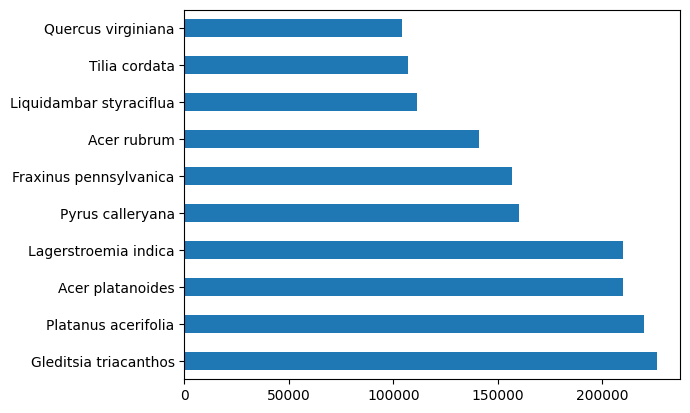

In [ ]:
count_species = tree_dataset['scientific_name'].value_counts().sort_values(ascending=False).head(10)
count_species.plot(kind='barh')

In [ ]:
# Scientific names and counts
scientific_names, counts = list(count_species.index), list(count_species.values)

# Common names, genus, family, order
common_names = []
tree_genus = []
tree_family = []
tree_order = []

for scientific_name in scientific_names:
  common_names.append(scientific_dict.get(scientific_name)[0])
  tree_genus.append(scientific_to_genus_dict.get(scientific_name))
  tree_family.append(scientific_to_family_dict.get(scientific_name))
  tree_order.append(scientific_to_order_dict.get(scientific_name))

# Average height
height_values = []
for scientific_name in scientific_names:
  scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
  height_values.append(round(scientific_subset["height_M"].mean(), 2))

# Average diameter_breast_height_CM
diameter_values = []
for scientific_name in scientific_names:
  scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
  diameter_values.append(round(scientific_subset["diameter_breast_height_CM"].mean(), 2))

In [ ]:
csv_name = "total.csv"
header = ['scientific_name', 'count', 'common_name', 'tree_genus', 'tree_family', 'tree_order', 'avg_height', 'avg_diameter']
labels = scientific_names
variables = np.column_stack((counts, common_names, tree_genus, tree_family, tree_order, height_values, diameter_values))
create_csv(csv_name, header, labels, variables)

## Barchart for each city

In [ ]:
# Create a dictionary
count_species_per_city = {}
unique_cities = tree_dataset['greater_metro'].unique()
unique_cities_labels = ['Albuquerque', 'Anaheim', 'Arlington', 'Atlanta', 'AuroraCO', 'Austin', 'Baltimore', 'Boston', 'Buffalo', 'CapeCoral',
                        'ColoradoSprings', 'Columbus', 'Dallas', 'Denver', 'DesMoines', 'Detroit', 'Durham', 'Fresno', 'GardenGrove', 'GrandRapids',
                        'Greensboro', 'Honolulu', 'Houston', 'HuntingtonBeach', 'Indianapolis', 'Irvine', 'Jerseycity', 'Knoxville', 'LasVegas', 'LosAngeles',
                        'Louisville', 'Madison', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'NewOrleans', 'NewYork', 'Oakland', 'OklahomaCity',
                        'Ontario', 'Orlando', 'OverlandPark', 'Phoenix', 'Pittsburgh', 'Plano', 'Portland', 'Providence', 'RanchoCucamonga', 'Richmond',
                        'Rochester', 'Sacramento', 'SanDiego', 'SanFrancisco', 'SanJose', 'SantaRosa', 'Seattle', 'SiouxFalls', 'StLouis', 'Stockton',
                        'Tampa', 'WashingtonDC', 'Worcester']

# Iterate over cities and for each one compute the top 10 scientific names
for idx, city in enumerate(unique_cities):
    city_data = tree_dataset[tree_dataset['greater_metro'] == city]
    count_species = city_data['scientific_name'].value_counts().reset_index()
    count_species.columns = ['scientific_name', 'count']
    count_species = count_species.sort_values(by='count', ascending=False).head(10)

    # Store the result in a dictionary where each key is a city name, and each value is a DataFrame
    count_species_per_city[unique_cities_labels[idx]] = count_species

In [ ]:
for city, dataframe in count_species_per_city.items():

  counts = list(dataframe.values[:, 1])
  common_names = []
  tree_genus = []
  tree_family = []
  tree_order = []
  height_values = []
  diameter_values = []

  for scientific_name, count in list(dataframe.values):
    scientific_subset = tree_dataset[tree_dataset['scientific_name'] == scientific_name]
    common_names.append(scientific_dict.get(scientific_name)[0]) # Common names
    tree_genus.append(scientific_to_genus_dict.get(scientific_name)) # Genus
    tree_family.append(scientific_to_family_dict.get(scientific_name)) # Family
    tree_order.append(scientific_to_order_dict.get(scientific_name)) # Order
    height_values.append(round(scientific_subset["height_M"].mean(), 2)) # Average height
    diameter_values.append(round(scientific_subset["diameter_breast_height_CM"].mean(), 2)) # Average diameter_breast_height_CM

  csv_name = str(city) + '.csv'
  header = ['scientific_name', 'count', 'common_name', 'tree_genus', 'tree_family', 'tree_order', 'avg_height', 'avg_diameter']
  labels = list(dataframe.values[:, 0])
  variables = np.column_stack((counts, common_names, tree_genus, tree_family, tree_order, height_values, diameter_values))

  create_csv(csv_name, header, labels, variables)

## Stacked bar chart for a specific state (California)

In [ ]:
tree_dataset['state'].value_counts()

California              1806085
New York                 787349
Colorado                 354878
Texas                    264285
Oregon                   216751
Minnesota                176834
District of Columbia     175847
Washington               164903
Ohio                     140876
Wisconsin                127623
Florida                  124208
Maryland                 121279
Louisiana                105786
Indiana                   97227
Michigan                  92023
Missouri                  83533
South Dakota              61304
Kansas                    44767
Pennsylvania              42079
Georgia                   41175
Kentucky                  32711
Nevada                    32006
Rhode Island              24082
North Carolina            22586
Massachusetts             16735
Iowa                      15805
Hawaii                    15150
Tennessee                 10411
Oklahoma                   8871
New Mexico                 2485
Virginia                   1815
New Jers

In [ ]:
california_trees = tree_dataset.loc[tree_dataset['state']=='California']
print(california_trees['greater_metro'].value_counts())
print("\n")
print(california_trees['scientific_name'].value_counts())

Los Angeles         581946
San Jose            264805
San Diego           212220
San Francisco       175106
Stockton             97707
Sacramento           84260
Rancho Cucamonga     80603
Anaheim              77019
Ontario              58577
Irvine               57769
HuntingtonBeach      55598
Oakland              35568
Garden Grove         17521
Fresno                6173
Santa Rosa            1213
Name: greater_metro, dtype: int64


Lagerstroemia indica       101276
Platanus acerifolia         96093
Liquidambar styraciflua     77900
Washingtonia robusta        75227
Magnolia grandiflora        68706
                            ...  
Cryptocarya rubra               1
Castanospermum australe         1
Juniperus recurva               1
Angophora lanceolata            1
Pinus elliottii                 1
Name: scientific_name, Length: 936, dtype: int64


In [ ]:
top_species = list(california_trees['scientific_name'].value_counts().index[:5])

### Order: alphabetic

In [ ]:
cities_list = list(california_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:])
cities_list.sort()
print(cities_list)

['Anaheim', 'Fresno', 'Garden Grove', 'HuntingtonBeach', 'Irvine', 'Los Angeles', 'Oakland', 'Ontario', 'Rancho Cucamonga', 'Sacramento', 'San Diego', 'San Francisco', 'San Jose', 'Santa Rosa', 'Stockton']


In [ ]:
weight_counts = {}
tree_counts = []

for species in top_species:
  for city in cities_list:
    tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])
  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

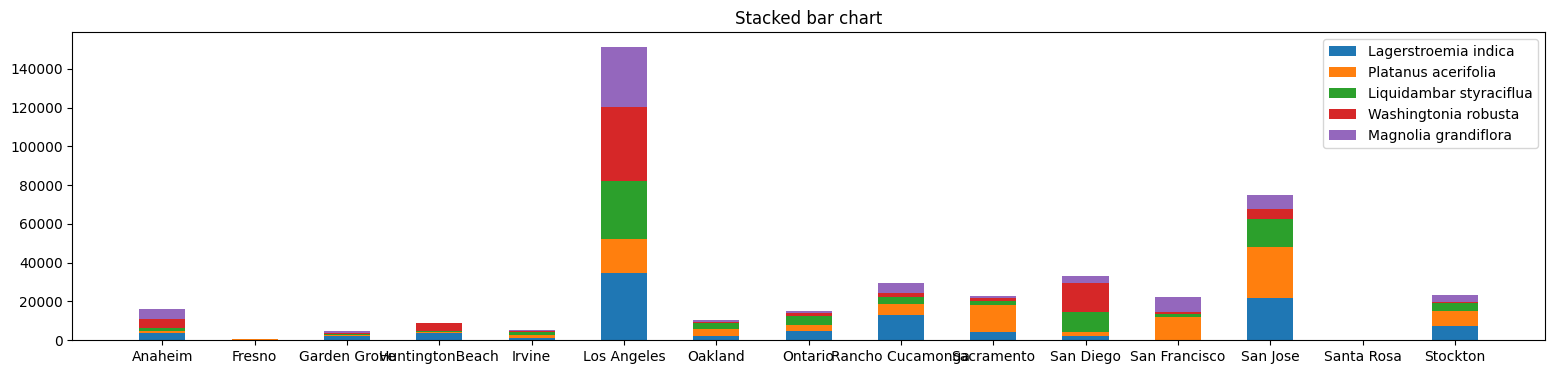

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']


In [ ]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia']


In [ ]:
csv_name = 'stacked_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'stacked_2.csv'
create_csv(csv_name, header, labels, variables, header2)

#### Add the *Others* variable

In [ ]:
weight_counts = {}
tree_counts = []
top_species_others = top_species.copy()
top_species_others.append('Others')

for species in top_species_others:
  for idx, city in enumerate(cities_list):
    if species == 'Others':
      total_trees = california_trees.loc[california_trees['greater_metro'] == city].shape[0]
      top_trees = sum(weight_counts.values())[idx]
      other_trees = total_trees - top_trees
      tree_counts.append(other_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

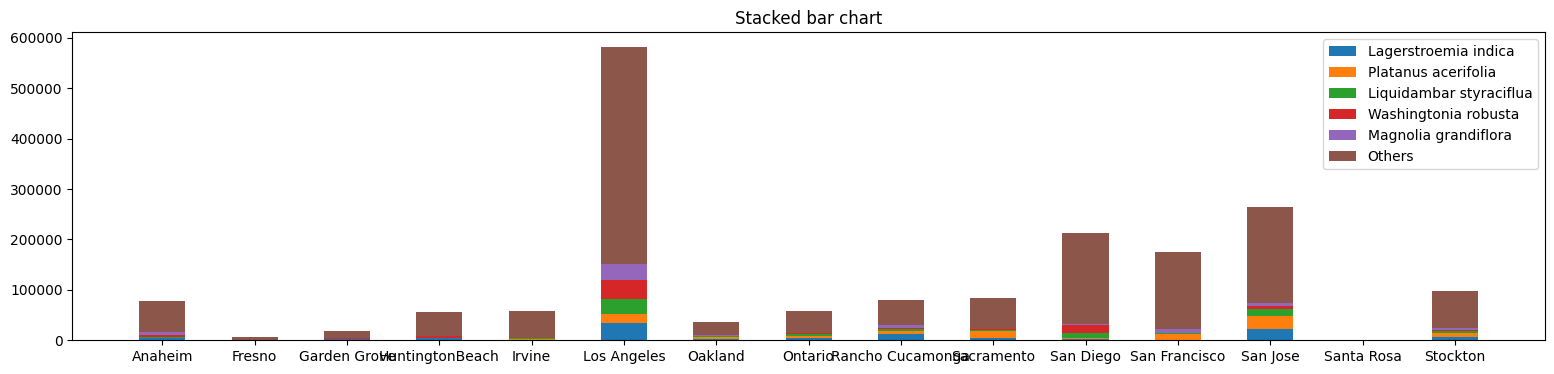

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Others')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Others']


In [ ]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Others')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Others']


In [ ]:
csv_name = 'stacked_others_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'stacked_others_2.csv'
create_csv(csv_name, header, labels, variables, header2)

#### Add the *Total* variable

In [ ]:
weight_counts = {}
tree_counts = []
top_species_total = top_species.copy()
top_species_total.append('Total')

for species in top_species_total:
  for idx, city in enumerate(cities_list):
    if species == 'Total':
      total_top_trees = sum(weight_counts.values())[idx]
      tree_counts.append(total_top_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

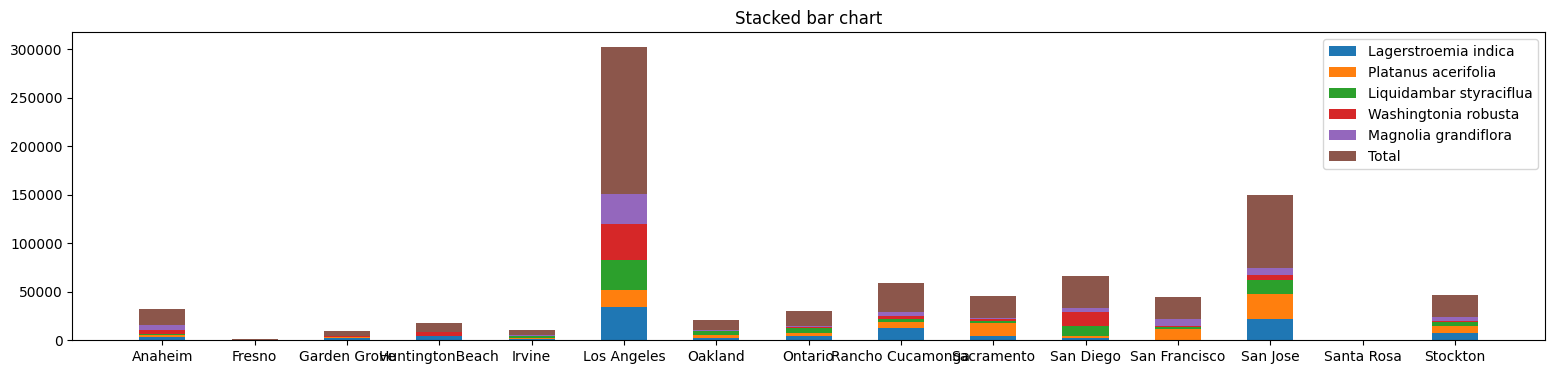

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Total')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Total']


In [ ]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Total')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Total']


In [ ]:
csv_name = 'stacked_total_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'stacked_total_2.csv'
create_csv(csv_name, header, labels, variables, header2)

### Order: counts of all trees

In [ ]:
cities_list = list(california_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:])
print(cities_list)

['Los Angeles', 'San Jose', 'San Diego', 'San Francisco', 'Stockton', 'Sacramento', 'Rancho Cucamonga', 'Anaheim', 'Ontario', 'Irvine', 'HuntingtonBeach', 'Oakland', 'Garden Grove', 'Fresno', 'Santa Rosa']


In [ ]:
weight_counts = {}
tree_counts = []

for species in top_species:
  for city in cities_list:
    tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])
  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

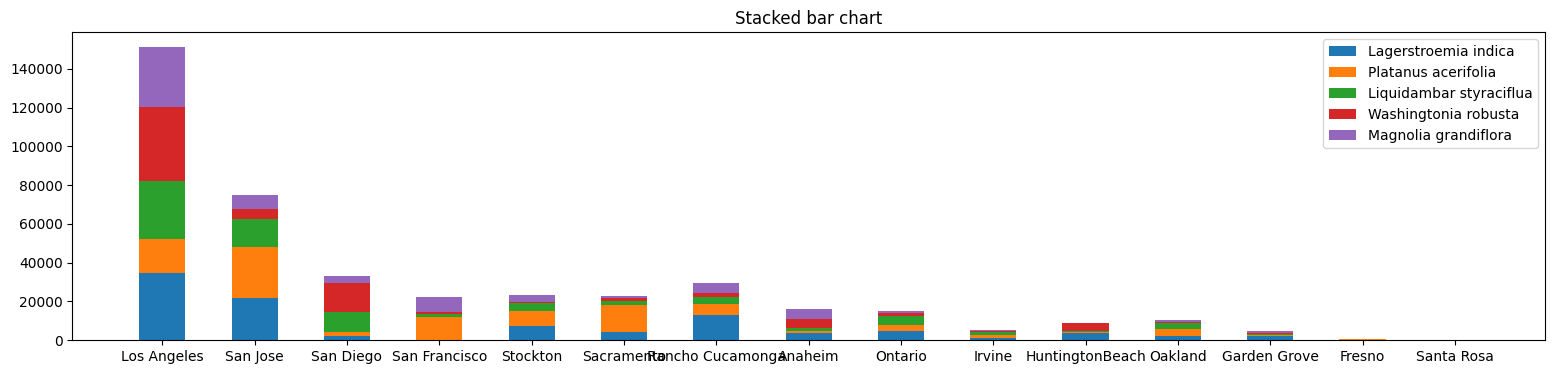

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']


In [ ]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia']


In [ ]:
csv_name = 'stacked_all_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'stacked_all_2.csv'
create_csv(csv_name, header, labels, variables, header2)

#### Add the *Others* variable

In [ ]:
weight_counts = {}
tree_counts = []
top_species_others = top_species.copy()
top_species_others.append('Others')

for species in top_species_others:
  for idx, city in enumerate(cities_list):
    if species == 'Others':
      total_trees = california_trees.loc[california_trees['greater_metro'] == city].shape[0]
      top_trees = sum(weight_counts.values())[idx]
      other_trees = total_trees - top_trees
      tree_counts.append(other_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

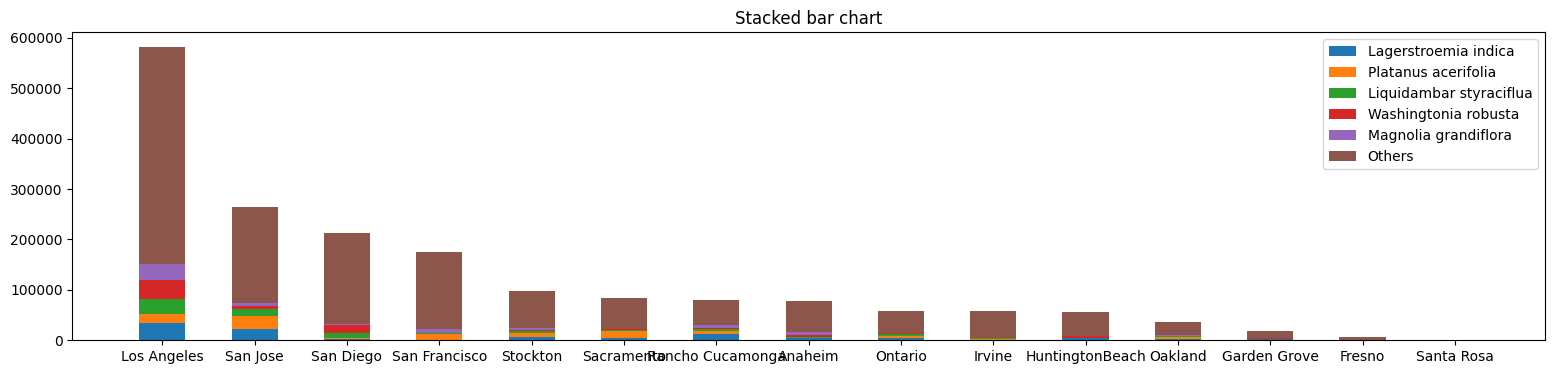

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Others')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Others']


In [ ]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Others')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Others']


In [ ]:
csv_name = 'stacked_all_others_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'stacked_all_others_2.csv'
create_csv(csv_name, header, labels, variables, header2)

#### Add the *Total* variable

In [ ]:
weight_counts = {}
tree_counts = []
top_species_total = top_species.copy()
top_species_total.append('Total')

for species in top_species_total:
  for idx, city in enumerate(cities_list):
    if species == 'Total':
      total_top_trees = sum(weight_counts.values())[idx]
      tree_counts.append(total_top_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

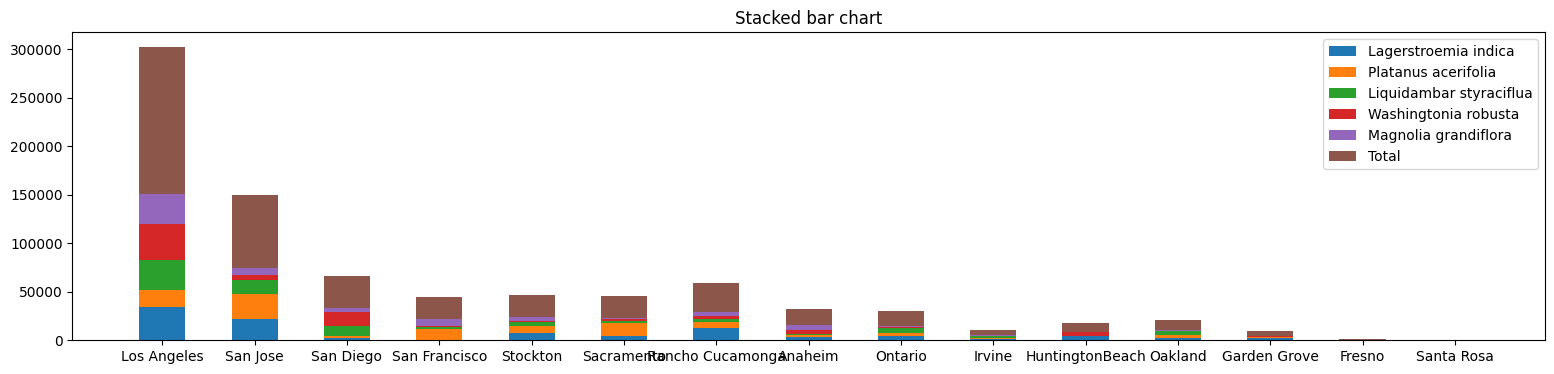

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Total')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Total']


In [ ]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Total')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Total']


In [ ]:
csv_name = 'stacked_all_total_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'stacked_all_total_2.csv'
create_csv(csv_name, header, labels, variables, header2)

### Order: counts of top 5 trees

In [ ]:
top_california_trees = california_trees.loc[california_trees['scientific_name'].isin(top_species)]
cities_list = list(top_california_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:])
print(cities_list)

['Los Angeles', 'San Jose', 'San Diego', 'Rancho Cucamonga', 'Stockton', 'Sacramento', 'San Francisco', 'Anaheim', 'Ontario', 'Oakland', 'HuntingtonBeach', 'Irvine', 'Garden Grove', 'Fresno', 'Santa Rosa']


In [ ]:
weight_counts = {}
tree_counts = []

for species in top_species:
  for city in cities_list:
    tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])
  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

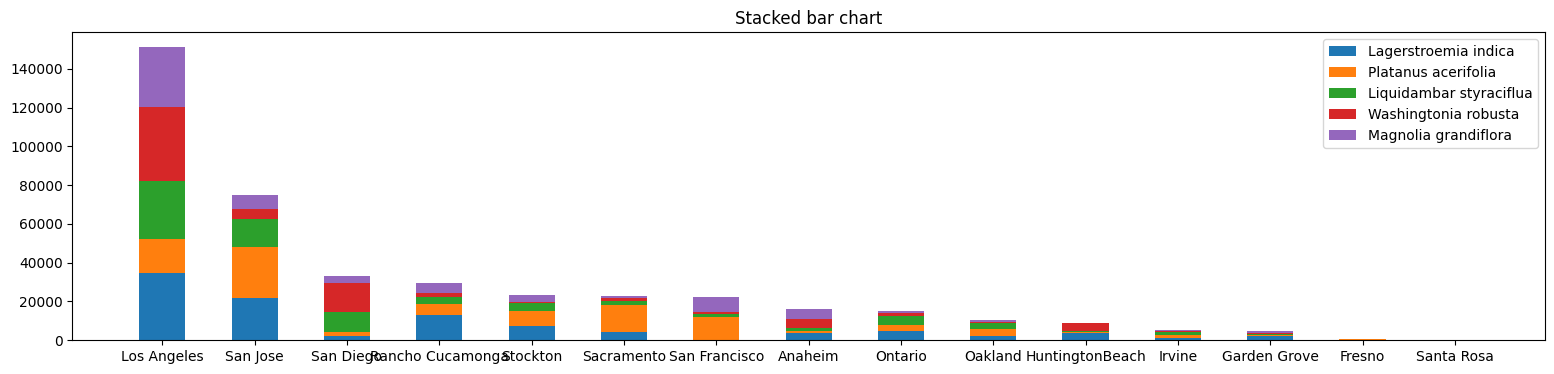

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora']


In [ ]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia']


In [ ]:
csv_name = 'stacked_top.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'stacked_top_2.csv'
create_csv(csv_name, header, labels, variables, header2)

#### Add the *Others* variable

In [ ]:
weight_counts = {}
tree_counts = []
top_species_others = top_species.copy()
top_species_others.append('Others')

for species in top_species_others:
  for idx, city in enumerate(cities_list):
    if species == 'Others':
      total_trees = california_trees.loc[california_trees['greater_metro'] == city].shape[0]
      top_trees = sum(weight_counts.values())[idx]
      other_trees = total_trees - top_trees
      tree_counts.append(other_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

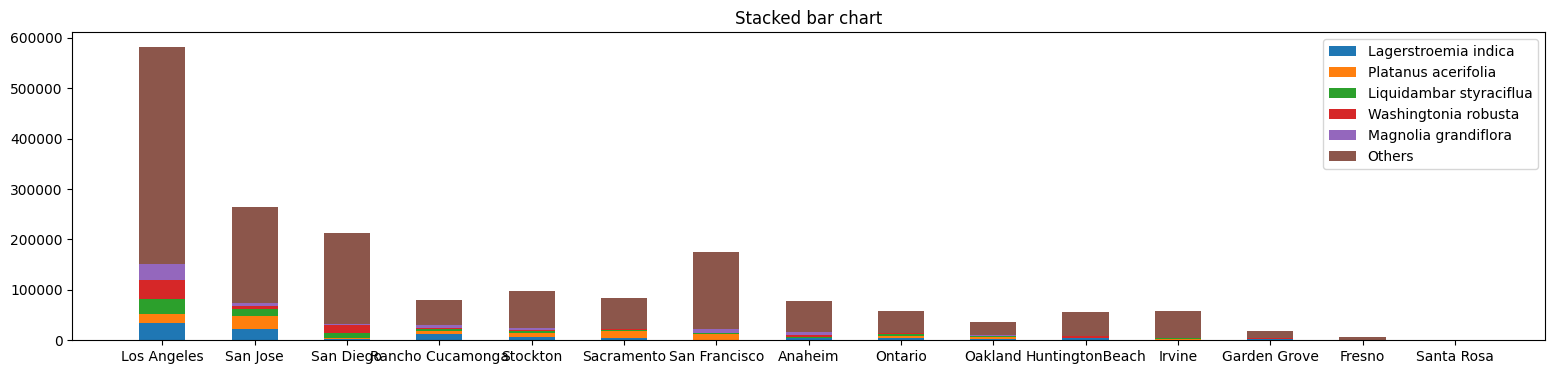

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Others')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Others']


In [ ]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Others')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Others']


In [ ]:
csv_name = 'stacked_top_others.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'stacked_top_others_2.csv'
create_csv(csv_name, header, labels, variables, header2)

#### Add the *Total* variable

In [ ]:
weight_counts = {}
tree_counts = []
top_species_total = top_species.copy()
top_species_total.append('Total')

for species in top_species_total:
  for idx, city in enumerate(cities_list):
    if species == 'Total':
      total_top_trees = sum(weight_counts.values())[idx]
      tree_counts.append(total_top_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

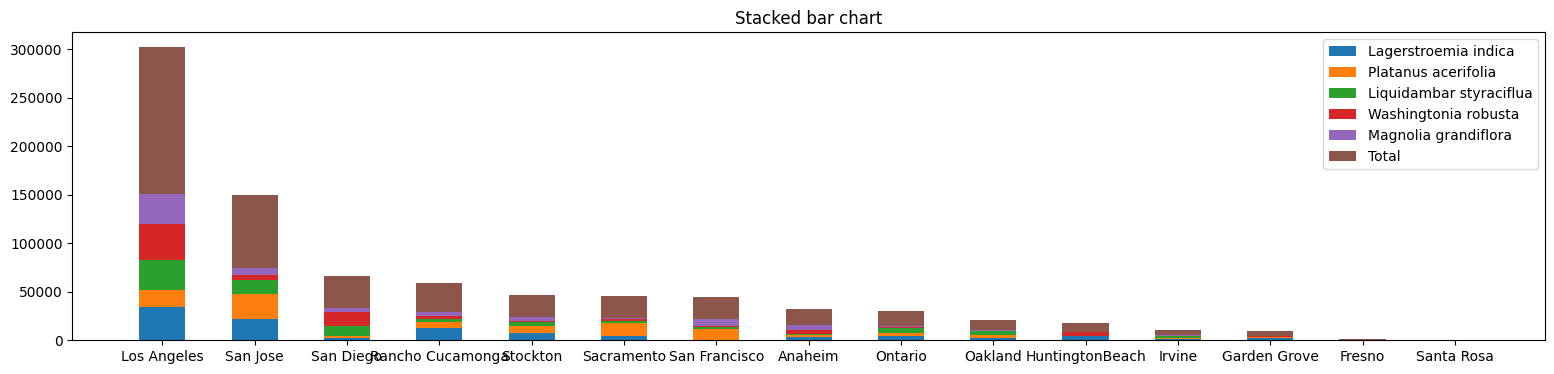

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Main header with scientific names
header = top_species.copy()
header.insert(0, 'city')
header.append('Total')
print(header)

['city', 'Lagerstroemia indica', 'Platanus acerifolia', 'Liquidambar styraciflua', 'Washingtonia robusta', 'Magnolia grandiflora', 'Total']


In [ ]:
common_names = []
for scientific_name in top_species:
  common_names.append(scientific_dict.get(scientific_name)[0])

# Secondary header with common names corresponding to the scientific names
header2 = common_names.copy()
header2.insert(0, 'city')
header2.append('Total')
print(header2)

['city', 'Crape myrtle', 'London planetree', 'American sweetgum', 'Mexican fan palm', 'Southern magnolia', 'Total']


In [ ]:
csv_name = 'stacked_top_total_1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'stacked_top_total_2.csv'
create_csv(csv_name, header, labels, variables, header2)

## Small multiples for a specific state (California)

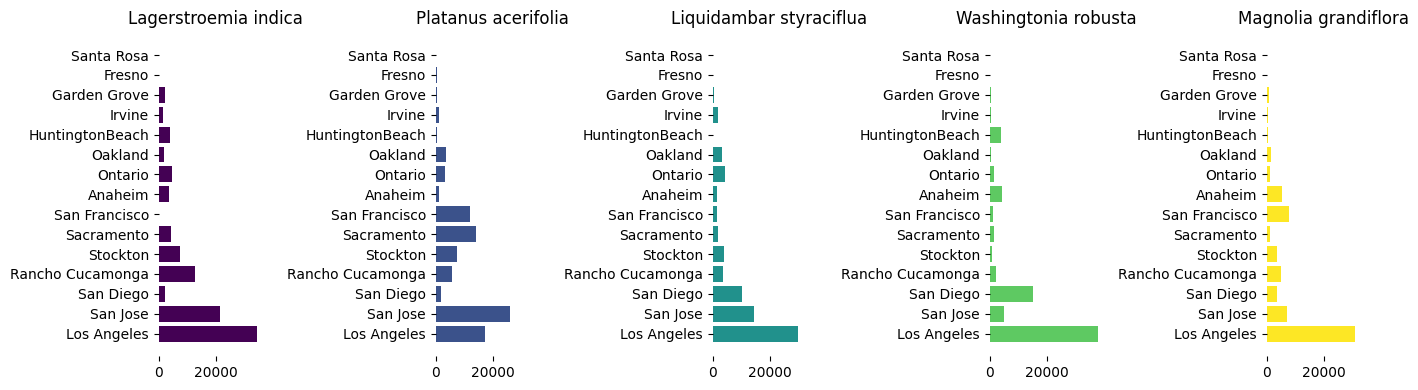

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(top_species), figsize=(14, 4), sharex=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_species)))

for i, (species, color) in enumerate(zip(top_species, colors)):
    species_data = california_trees.loc[california_trees['scientific_name'] == species]

    for j, city in enumerate(cities_list):
        city_data = species_data[species_data['greater_metro'] == city]
        count = city_data.shape[0]

        # Create a horizontal bar for the current city in the current species
        ax = axes[i]
        ax.barh(city, count, label=city, color=color)

    ax.set_title(species)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

We create one dataset for each type of tree we are considering (top 5) and one for the *Others* variable, as if we were subdividing the 'stacked_top_others_1.csv'.

In [ ]:
weight_counts = {}
tree_counts = []
top_species_others = top_species.copy()
top_species_others.append('Others')

for species in top_species_others:
  for idx, city in enumerate(cities_list):
    if species == 'Others':
      total_trees = california_trees.loc[california_trees['greater_metro'] == city].shape[0]
      top_trees = sum(weight_counts.values())[idx]
      other_trees = total_trees - top_trees
      tree_counts.append(other_trees)
    else:
      tree_counts.append(california_trees.loc[(california_trees['scientific_name'] == species) & (california_trees['greater_metro'] == city)].shape[0])

  if (len(tree_counts)==len(cities_list)):
    weight_counts.update({species: np.array(tree_counts)})
    tree_counts = []

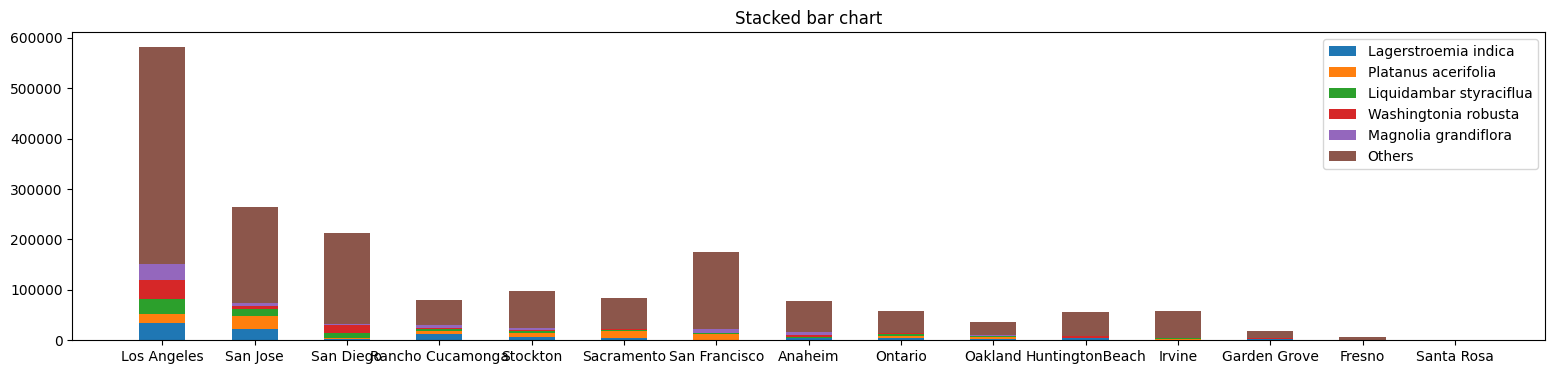

In [ ]:
cities = tuple(cities_list)
num_cities = len(cities_list)
width = 0.5
fig, ax = plt.subplots(figsize=(19,4))
bottom = np.zeros(num_cities)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(cities, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Stacked bar chart")
ax.legend(loc="upper right")
plt.show()

In [ ]:
header = ['city','count']

In [ ]:
csv_name = 'small_multiple1.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))[:,0].reshape([15,1])
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'small_multiple2.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))[:,1].reshape([15,1])
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'small_multiple3.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))[:,2].reshape([15,1])
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'small_multiple4.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))[:,3].reshape([15,1])
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'small_multiple5.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))[:,4].reshape([15,1])
create_csv(csv_name, header, labels, variables)

In [ ]:
csv_name = 'small_multiple6.csv'
labels = cities_list
variables = np.transpose(list(weight_counts.values()))[:,5].reshape([15,1])
create_csv(csv_name, header, labels, variables)

## Heatmap for a specific state (California)

In [ ]:
top_california_trees = california_trees.loc[california_trees['scientific_name'].isin(top_species)]
cities_list = list(top_california_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:])
print(cities_list)

['Los Angeles', 'San Jose', 'San Diego', 'Rancho Cucamonga', 'Stockton', 'Sacramento', 'San Francisco', 'Anaheim', 'Ontario', 'Oakland', 'HuntingtonBeach', 'Irvine', 'Garden Grove', 'Fresno', 'Santa Rosa']


Identify the top 5 type of trees for each city in California

In [ ]:
LosAngeles_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Los Angeles']
SanJose_trees = tree_dataset.loc[tree_dataset['greater_metro']=='San Jose']
SanDiego_trees = tree_dataset.loc[tree_dataset['greater_metro']=='San Diego']
SanFrancisco_trees = tree_dataset.loc[tree_dataset['greater_metro']=='San Francisco']
Stockton_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Stockton']
Sacramento_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Sacramento']
RanchoCucamonga_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Rancho Cucamonga']
Anaheim_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Anaheim']
Ontario_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Ontario']
Irvine_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Irvine']
HuntingtonBeach_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Huntington Beach']
Oakland_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Oakland']
GardenGrove_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Garden Grove']
Fresno_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Fresno']
SantaRosa_trees = tree_dataset.loc[tree_dataset['greater_metro']=='Santa Rosa']

In [ ]:
top_LosAngeles_species = set(list(LosAngeles_trees['scientific_name'].value_counts().index[:3]))
top_SanJose_species = set(list(SanJose_trees['scientific_name'].value_counts().index[:3]))
top_SanDiego_species = set(list(SanDiego_trees['scientific_name'].value_counts().index[:3]))
top_SanFrancisco_species = set(list(SanFrancisco_trees['scientific_name'].value_counts().index[:3]))
top_Stockton_species = set(list(Stockton_trees['scientific_name'].value_counts().index[:3]))
top_Sacramento_species = set(list(Sacramento_trees['scientific_name'].value_counts().index[:3]))
top_RanchoCucamonga_species = set(list(RanchoCucamonga_trees['scientific_name'].value_counts().index[:3]))
top_Anaheim_species = set(list(Anaheim_trees['scientific_name'].value_counts().index[:3]))
top_Ontario_species = set(list(Ontario_trees['scientific_name'].value_counts().index[:3]))
top_Irvine_species = set(list(Irvine_trees['scientific_name'].value_counts().index[:3]))
top_HuntingtonBeach_species = set(list(HuntingtonBeach_trees['scientific_name'].value_counts().index[:3]))
top_Oakland_species = set(list(Oakland_trees['scientific_name'].value_counts().index[:3]))
top_GardenGrove_species = set(list(GardenGrove_trees['scientific_name'].value_counts().index[:3]))
top_Fresno_species = set(list(Fresno_trees['scientific_name'].value_counts().index[:3]))
top_SantaRosa_species = set(list(SantaRosa_trees['scientific_name'].value_counts().index[:3]))

In [ ]:
print(top_LosAngeles_species)
print(top_SanJose_species)
print(top_SanDiego_species)
print(top_SanFrancisco_species)
print(top_Stockton_species)
print(top_Sacramento_species)
print(top_RanchoCucamonga_species)
print(top_Anaheim_species)
print(top_Ontario_species)
print(top_Irvine_species)
print(top_HuntingtonBeach_species)
print(top_Oakland_species)
print(top_GardenGrove_species)
print(top_Fresno_species)
print(top_SantaRosa_species)

{'Lagerstroemia indica', 'Washingtonia robusta', 'Magnolia grandiflora'}
{'Lagerstroemia indica', 'Platanus acerifolia', 'Pistacia chinensis'}
{'Cupaniopsis anacardioides', 'Syagrus romanzoffianum', 'Washingtonia robusta'}
{'Metrosideros excelsa', 'Platanus acerifolia', 'Tristaniopsis laurina'}
{'Lagerstroemia indica', 'Platanus acerifolia', 'Pistacia chinensis'}
{'Platanus acerifolia', 'Pistacia chinensis', 'Pyrus calleryana'}
{'Lagerstroemia indica', 'Platanus acerifolia', 'Eucalyptus globulus'}
{'Gleditsia triacanthos', 'Washingtonia robusta', 'Magnolia grandiflora'}
{'Lagerstroemia indica', 'Cinnamomum camphora', 'Liquidambar styraciflua'}
{'Eucalyptus globulus', 'Eucalyptus maculata', 'Pinus canariensis'}
set()
{'Platanus acerifolia', 'Prunus', 'Liquidambar styraciflua'}
{'Lagerstroemia indica', 'Lophostemon confertus', 'Cupaniopsis anacardioides'}
{'Pistacia chinensis', 'Cedrus deodara', 'Quercus lobata'}
{'Abies', 'Sequoia sempervirens', 'Quercus'}


In [ ]:
all_top_species = list(top_LosAngeles_species.union(top_SanJose_species,
                                                    top_SanDiego_species,
                                                    top_SanFrancisco_species,
                                                    top_Stockton_species,
                                                    top_Sacramento_species,
                                                    top_RanchoCucamonga_species,
                                                    top_Anaheim_species,
                                                    top_Ontario_species,
                                                    top_Irvine_species,
                                                    top_HuntingtonBeach_species,
                                                    top_Oakland_species,
                                                    top_GardenGrove_species,
                                                    top_Fresno_species,
                                                    top_SantaRosa_species))
all_top_species.sort()
print(all_top_species)

['Abies', 'Cedrus deodara', 'Cinnamomum camphora', 'Cupaniopsis anacardioides', 'Eucalyptus globulus', 'Eucalyptus maculata', 'Gleditsia triacanthos', 'Lagerstroemia indica', 'Liquidambar styraciflua', 'Lophostemon confertus', 'Magnolia grandiflora', 'Metrosideros excelsa', 'Pinus canariensis', 'Pistacia chinensis', 'Platanus acerifolia', 'Prunus', 'Pyrus calleryana', 'Quercus', 'Quercus lobata', 'Sequoia sempervirens', 'Syagrus romanzoffianum', 'Tristaniopsis laurina', 'Washingtonia robusta']


In [ ]:
heatmap = []
for city in cities_list:
  for species in all_top_species:
    city_trees = california_trees.loc[california_trees['greater_metro']==city]
    count = city_trees.loc[city_trees['scientific_name']==species].shape[0]
    row = [city, species, count]
    heatmap.append(row)

heatmap_array = np.array(heatmap)

In [ ]:
csv_name = 'heatmap.csv'
header = ['city', 'species', 'count']
labels = list(heatmap_array[:,0])
variables = list(heatmap_array[:,1:])
create_csv(csv_name, header, labels, variables)

Now, we do the same adding also the columns containing *common_name*, *tree_genus*, *tree_family* and *tree_order*.

In [ ]:
heatmap2 = []
for city in cities_list:
  for species in all_top_species:
    city_trees = california_trees.loc[california_trees['greater_metro']==city]
    count = city_trees.loc[city_trees['scientific_name']==species].shape[0]
    common_name = scientific_dict.get(species)[0]
    tree_genus = scientific_to_genus_dict.get(species)
    tree_family = scientific_to_family_dict.get(species)
    tree_order = scientific_to_order_dict.get(species)
    row = [city, species, count, common_name, tree_genus, tree_family, tree_order]
    heatmap2.append(row)

heatmap2_array = np.array(heatmap2)

In [ ]:
csv_name = 'heatmap2.csv'
header = ['city', 'species', 'count', 'common_name', 'tree_genus', 'tree_family', 'tree_order']
labels = list(heatmap2_array[:,0])
variables = list(heatmap2_array[:,1:])
create_csv(csv_name, header, labels, variables)

# Section 2

## Only for California

In [ ]:
states_list = ["California"]
cities_list = list(california_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:])
species_list = list(tree_dataset['tree_family'].value_counts().sort_values(ascending=False).index[:15])

sankey = []

# From state to city
for state in states_list:
  for city in cities_list:
    count = california_trees.loc[california_trees['greater_metro']==city].shape[0]
    if count == 0:
      continue
    else:
      row = [state, city, count]
      sankey.append(row)

# From city to tree_species
for city in cities_list:
  for species in species_list:
    city_trees = tree_dataset.loc[tree_dataset['greater_metro']==city]
    count = city_trees.loc[city_trees['tree_family']==species].shape[0]
    if count == 0:
      continue
    else:
      row = [city, species, count]
      sankey.append(row)

# Convert list of lists to array
sankey_array = np.array(sankey)

In [ ]:
csv_name = 'sankey.csv'
header = ['source', 'target', 'value']
labels = list(sankey_array[:,0])
variables = list(sankey_array[:,1:])
create_csv(csv_name, header, labels, variables)

## All cities and states (top 30 species)

In [ ]:
states_list = list(tree_dataset['state'].value_counts().sort_values(ascending=False).index[:])
cities_list = list(tree_dataset['greater_metro'].value_counts().sort_values(ascending=False).index[:])
species_list = list(tree_dataset['tree_family'].value_counts().sort_values(ascending=False).index[:30])

sankey = []

# From state to city
for state in states_list:
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  for city in cities_list:
    count = state_trees.loc[state_trees['greater_metro']==city].shape[0]
    if count == 0:
      continue
    else:
      row = [state, city, count]
      sankey.append(row)

# From city to tree_species
for city in cities_list:
  city_trees = tree_dataset.loc[tree_dataset['greater_metro']==city]
  for species in species_list:
    count = city_trees.loc[city_trees['tree_family']==species].shape[0]
    if count == 0:
      continue
    else:
      row = [city, species, count]
      sankey.append(row)

# Convert list of lists to array
sankey_array = np.array(sankey)

In [ ]:
csv_name = 'sankey_all.csv'
header = ['source', 'target', 'value']
labels = list(sankey_array[:,0])
variables = list(sankey_array[:,1:])
create_csv(csv_name, header, labels, variables)

## Add the *Others* variable ONLY for *tree_family*

In [ ]:
states_list = list(tree_dataset['state'].value_counts().sort_values(ascending=False).index[:])

cities_list = list(tree_dataset['greater_metro'].value_counts().sort_values(ascending=False).index[:])

species_list = list(tree_dataset['tree_family'].value_counts().sort_values(ascending=False).index[:30])
species_list_others = species_list.copy()
species_list_others.append('Others')

sankey = []

# From state to city
for state in states_list:
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  for city in cities_list:
    count = state_trees.loc[state_trees['greater_metro']==city].shape[0]
    if count == 0:
      continue
    else:
      row = [state, city, count]
      sankey.append(row)

# From city to tree_species
for city in cities_list:
  top_trees = 0
  city_trees = tree_dataset.loc[tree_dataset['greater_metro']==city]
  for species in species_list_others:
    if species == 'Others':
      total_trees = city_trees.shape[0]
      count = total_trees - top_trees
    else:
      count = city_trees.loc[city_trees['tree_family']==species].shape[0]
      top_trees += count
    if count == 0:
      continue
    else:
      row = [city, species, count]
      sankey.append(row)

# Convert list of lists to array
sankey_array = np.array(sankey)

In [ ]:
csv_name = 'sankey_others_species.csv'
header = ['source', 'target', 'value']
labels = list(sankey_array[:,0])
variables = list(sankey_array[:,1:])
create_csv(csv_name, header, labels, variables)

## Add the *Others* variable ONLY for *city* and *tree_family*

STILL TO BE DONE: treat *Other cities* as a single entity.

In [ ]:
states_list = list(tree_dataset['state'].value_counts().sort_values(ascending=False).index[:])
states_list.sort()

all_cities_list = list(tree_dataset['greater_metro'].value_counts().sort_values(ascending=False).index[:])
all_cities_list.sort()
cities_list = []
for state in states_list:
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  city1 = state_trees['greater_metro'].value_counts().sort_values(ascending=False).index[0]
  cities_list.append(city1)
  try:
    city2 = state_trees['greater_metro'].value_counts().sort_values(ascending=False).index[1]
    cities_list.append(city2)
  except:
    continue
cities_list.sort()
cities_list_others = cities_list.copy()
cities_list_others.append('Other cities')

species_list = list(tree_dataset['tree_family'].value_counts().sort_values(ascending=False).index[:30])
species_list.sort()
species_list_others = species_list.copy()
species_list_others.append('Other species')

sankey = []

# From state to city + 'Other cities'
for state in states_list:
  top_cities_trees = 0
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  for city in cities_list_others:
    if city == 'Other cities':
      total_trees = state_trees.shape[0]
      count = total_trees - top_cities_trees
    else:
      count = state_trees.loc[state_trees['greater_metro']==city].shape[0]
      top_cities_trees += count
    if count == 0:
      continue
    else:
      row = [state, city, count]
      sankey.append(row)

# From city to tree_species
for city in cities_list:
  top_trees = 0
  city_trees = tree_dataset.loc[tree_dataset['greater_metro']==city]
  for species in species_list_others:
    if species == 'Other species':
      total_trees = city_trees.shape[0]
      count = total_trees - top_trees
    else:
      count = city_trees.loc[city_trees['tree_family']==species].shape[0]
      top_trees += count
    if count == 0:
      continue
    else:
      row = [city, species, count]
      sankey.append(row)

# From 'Other cities' to tree_species
all_cities_set = set(all_cities_list)
cities_set = set(cities_list)
other_cities = list(all_cities_set.difference(cities_set))
other_cities.sort()
for city in other_cities:
  top_trees = 0
  city_trees = tree_dataset.loc[tree_dataset['greater_metro']==city]
  for species in species_list_others:
    if species == 'Other species':
      total_trees = city_trees.shape[0]
      count = total_trees - top_trees
    else:
      count = city_trees.loc[city_trees['tree_family']==species].shape[0]
      top_trees += count
    if count == 0:
      continue
    else:
      row = ['Other cities', species, count]
      sankey.append(row)

# Convert list of lists to array
sankey_array = np.array(sankey)

In [ ]:
csv_name = 'sankey_others_cities.csv'
header = ['source', 'target', 'value']
labels = list(sankey_array[:,0])
variables = list(sankey_array[:,1:])
create_csv(csv_name, header, labels, variables)

## Add the *Others* variable for *state*, for *city* and for *tree_family*

STILL TO BE DONE: treat *Other cities* and *Other states* as a single entity.

In [ ]:
states_list = list(tree_dataset['state'].value_counts().sort_values(ascending=False).index[:10])

cities_list = list(tree_dataset['greater_metro'].value_counts().sort_values(ascending=False).index[:15])
cities_list_others = cities_list.copy()
cities_list_others.append('Other cities')

species_list = list(tree_dataset['tree_family'].value_counts().sort_values(ascending=False).index[:15])
species_list_others = species_list.copy()
species_list_others.append('Other species')

sankey = []

# From state to city + 'Other cities'
for state in states_list:
  top_cities_trees = 0
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  for city in cities_list_others:
    if city == 'Other cities':
      total_trees = state_trees.shape[0]
      count = total_trees - top_cities_trees
    else:
      count = state_trees.loc[state_trees['greater_metro']==city].shape[0]
      top_cities_trees += count
    if count == 0:
      continue
    else:
      row = [state, city, count]
      sankey.append(row)

# From 'Other states' to city + 'Other cities'
other_states = list(tree_dataset['state'].value_counts().sort_values(ascending=False).index[10:])
for state in other_states:
  top_cities_trees = 0
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  for city in cities_list_others:
    if city == 'Other cities':
      total_trees = state_trees.shape[0]
      count = total_trees - top_cities_trees
    else:
      count = state_trees.loc[state_trees['greater_metro']==city].shape[0]
      top_cities_trees += count
    if count == 0:
      continue
    else:
      row = ['Other states', city, count]
      sankey.append(row)

# From city to tree_species
for city in cities_list:
  top_trees = 0
  city_trees = tree_dataset.loc[tree_dataset['greater_metro']==city]
  for species in species_list_others:
    if species == 'Other species':
      total_trees = city_trees.shape[0]
      count = total_trees - top_trees
    else:
      count = city_trees.loc[city_trees['tree_family']==species].shape[0]
      top_trees += count
    if count == 0:
      continue
    else:
      row = [city, species, count]
      sankey.append(row)

# From 'Other cities' to tree_species
other_cities = list(tree_dataset['greater_metro'].value_counts().sort_values(ascending=False).index[15:])
for city in other_cities:
  top_trees = 0
  city_trees = tree_dataset.loc[tree_dataset['greater_metro']==city]
  for species in species_list_others:
    if species == 'Other species':
      total_trees = city_trees.shape[0]
      count = total_trees - top_trees
    else:
      count = city_trees.loc[city_trees['tree_family']==species].shape[0]
      top_trees += count
    if count == 0:
      continue
    else:
      row = ['Other cities', species, count]
      sankey.append(row)

# Convert list of lists to array
sankey_array = np.array(sankey)

In [ ]:
csv_name = 'sankey_others.csv'
header = ['source', 'target', 'value']
labels = list(sankey_array[:,0])
variables = list(sankey_array[:,1:])
create_csv(csv_name, header, labels, variables)

## An alternative based on geographic distribution (33/50 states)

### North/West/South

In [ ]:
north = ['Massachussetts', 'New York', 'Pennsylvania', 'New Jersey', 'Rhode Island', 'Minnesota', 'Wisconsin',
         'South Dakota', 'Iowa', 'Kansas', 'Missouri', 'Indiana', 'Ohio', 'Michigan', 'District of Columbia']
west = ['Washington', 'Oregon', 'California', 'Nevada', 'Colorado', 'Arizona', 'New Mexico']
south = ['Texas', 'Oklahoma', 'Louisiana', 'Kentucky', 'Tennessee', 'Georgia', 'Florida', 'North Carolina',
         'Virginia', 'Maryland', 'Delaware']

In [ ]:
top_north = list(tree_dataset.loc[tree_dataset['state'].isin(north)]['state'].value_counts().sort_values(ascending=False).index[:6])
top_west = list(tree_dataset.loc[tree_dataset['state'].isin(west)]['state'].value_counts().sort_values(ascending=False).index[:3])
top_south = list(tree_dataset.loc[tree_dataset['state'].isin(south)]['state'].value_counts().sort_values(ascending=False).index[:3])

print(top_north)
print(top_west)
print(top_south)

['New York', 'Minnesota', 'District of Columbia', 'Ohio', 'Wisconsin', 'Indiana']
['California', 'Colorado', 'Oregon']
['Texas', 'Florida', 'Maryland']


In [ ]:
species_list = list(tree_dataset['tree_family'].value_counts().sort_values(ascending=False).index[:20])

sankey = []

# From states to north
count = tree_dataset.loc[tree_dataset['state'].isin(north)].shape[0]
if count != 0:
  row = ['33 USA states', 'North', count]
  sankey.append(row)

# From states to west
count = tree_dataset.loc[tree_dataset['state'].isin(west)].shape[0]
if count != 0:
  row = ['33 USA states', 'West', count]
  sankey.append(row)

# From states to south
count = tree_dataset.loc[tree_dataset['state'].isin(south)].shape[0]
if count != 0:
  row = ['33 USA states', 'South', count]
  sankey.append(row)

In [ ]:
# From north to state
for state in top_north:
  count = tree_dataset.loc[tree_dataset['state']==state].shape[0]
  if count == 0:
    continue
  else:
    row = ['North', state, count]
    sankey.append(row)

# From west to state
for state in top_west:
  count = tree_dataset.loc[tree_dataset['state']==state].shape[0]
  if count == 0:
    continue
  else:
    row = ['West', state, count]
    sankey.append(row)

# From south to state
for state in top_south:
  count = tree_dataset.loc[tree_dataset['state']==state].shape[0]
  if count == 0:
    continue
  else:
    row = ['South', state, count]
    sankey.append(row)

In [ ]:
# From northern state to city
for state in top_north:
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  cities_list = list(state_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:2])
  for city in cities_list:
    city_trees = state_trees.loc[state_trees['greater_metro']==city]
    count = city_trees.shape[0]
    if count == 0:
      continue
    else:
      row = [state, city, count]
      sankey.append(row)
    # From city to species
    for species in species_list:
      count_species = city_trees.loc[city_trees['tree_family']==species].shape[0]
      if count_species == 0:
        continue
      else:
        row = [city, species, count_species]
        sankey.append(row)

# From western state to city
for state in top_west:
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  if state=='California':
    cities_list = list(state_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:6])
  else:
    cities_list = list(state_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:2])
  for city in cities_list:
    city_trees = state_trees.loc[state_trees['greater_metro']==city]
    count = city_trees.shape[0]
    if count == 0:
      continue
    else:
      row = [state, city, count]
      sankey.append(row)
    # From city to species
    for species in species_list:
      count_species = city_trees.loc[city_trees['tree_family']==species].shape[0]
      if count_species == 0:
        continue
      else:
        row = [city, species, count_species]
        sankey.append(row)

# From southern state to city
for state in top_south:
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  cities_list = list(state_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:2])
  for city in cities_list:
    city_trees = state_trees.loc[state_trees['greater_metro']==city]
    if count == 0:
      continue
    else:
      count = city_trees.shape[0]
      row = [state, city, count]
    sankey.append(row)
    # From city to species
    for species in species_list:
      count_species = city_trees.loc[city_trees['tree_family']==species].shape[0]
      if count_species == 0:
        continue
      else:
        row = [city, species, count_species]
        sankey.append(row)

In [ ]:
# Convert list of lists to array
sankey_array = np.array(sankey)

In [ ]:
csv_name = 'sankey_alternative.csv'
header = ['source', 'target', 'value']
labels = list(sankey_array[:,0])
variables = list(sankey_array[:,1:])
create_csv(csv_name, header, labels, variables)

### North/South

In [ ]:
north = ['Washington', 'Oregon', 'Nevada', 'Colorado', 'Massachussetts', 'New York', 'Pennsylvania', 'New Jersey', 'Rhode Island', 'Minnesota', 'Wisconsin',
         'South Dakota', 'Iowa', 'Kansas', 'Missouri', 'Indiana', 'Ohio', 'Michigan']

south = ['California', 'Arizona', 'New Mexico', 'Texas', 'Oklahoma', 'Louisiana', 'Kentucky', 'Tennessee', 'Georgia', 'Florida', 'North Carolina',
         'Virginia', 'Maryland', 'Delaware', 'District of Columbia']

In [ ]:
top_north = list(tree_dataset.loc[tree_dataset['state'].isin(north)]['state'].value_counts().sort_values(ascending=False).index[:6])
top_south = list(tree_dataset.loc[tree_dataset['state'].isin(south)]['state'].value_counts().sort_values(ascending=False).index[:6])

print(top_north)
print(top_south)

['New York', 'Colorado', 'Oregon', 'Minnesota', 'Washington', 'Ohio']
['California', 'Texas', 'District of Columbia', 'Florida', 'Maryland', 'Louisiana']


In [ ]:
species_list = list(tree_dataset['tree_family'].value_counts().sort_values(ascending=False).index[:20])

sankey = []

# From states to north
count = tree_dataset.loc[tree_dataset['state'].isin(north)].shape[0]
if count != 0:
  row = ['33 USA states', 'North', count]
  sankey.append(row)

# From states to south
count = tree_dataset.loc[tree_dataset['state'].isin(south)].shape[0]
if count != 0:
  row = ['33 USA states', 'South', count]
  sankey.append(row)

In [ ]:
# From north to state
for state in top_north:
  count = tree_dataset.loc[tree_dataset['state']==state].shape[0]
  if count == 0:
    continue
  else:
    row = ['North', state, count]
    sankey.append(row)

# From south to state
for state in top_south:
  count = tree_dataset.loc[tree_dataset['state']==state].shape[0]
  if count == 0:
    continue
  else:
    row = ['South', state, count]
    sankey.append(row)

In [ ]:
# From northern state to city
for state in top_north:
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  cities_list = list(state_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:2])
  for city in cities_list:
    city_trees = state_trees.loc[state_trees['greater_metro']==city]
    count = city_trees.shape[0]
    if count == 0:
      continue
    else:
      row = [state, city, count]
      sankey.append(row)
    # From city to species
    for species in species_list:
      count_species = city_trees.loc[city_trees['tree_family']==species].shape[0]
      if count_species == 0:
        continue
      else:
        row = [city, species, count_species]
        sankey.append(row)

# From southern state to city
for state in top_south:
  state_trees = tree_dataset.loc[tree_dataset['state']==state]
  if state=='California':
    cities_list = list(state_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:6])
  else:
    cities_list = list(state_trees['greater_metro'].value_counts().sort_values(ascending=False).index[:2])
  for city in cities_list:
    city_trees = state_trees.loc[state_trees['greater_metro']==city]
    count = city_trees.shape[0]
    if count == 0:
      continue
    else:
      row = [state, city, count]
      sankey.append(row)
    # From city to species
    for species in species_list:
      count_species = city_trees.loc[city_trees['tree_family']==species].shape[0]
      if count_species == 0:
        continue
      else:
        row = [city, species, count_species]
        sankey.append(row)

In [ ]:
# Convert list of lists to array
sankey_array = np.array(sankey)

In [ ]:
csv_name = 'sankey_NS.csv'
header = ['source', 'target', 'value']
labels = list(sankey_array[:,0])
variables = list(sankey_array[:,1:])
create_csv(csv_name, header, labels, variables)

# Download ALL .csv files

In [ ]:
tree_dataset.to_csv('tree_dataset.csv', index=False, na_rep='NA')

In [ ]:
directory_path = '/content'
file_type = ".csv"
files_to_download = glob.glob(f"{directory_path}/*{file_type}")
zip_filename = "datasets.zip"
with zipfile.ZipFile(zip_filename, "w") as zipf:
    for file in files_to_download:
        zipf.write(file, arcname=os.path.basename(file))
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>